In [2]:
# import numpy as np
import pandas as pd
import os
import glob
import numpy as np
import scipy
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns   
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings
from pylab import rcParams
import statsmodels.api as sm
import itertools

In [3]:
# changing directory for all listing csv files
os.chdir('D:/airbnb/USA/ALL-Listings/')

In [4]:
# dfs = {}
# for idx, f in enumerate(glob.iglob('*.csv'), 1):
#     dfs[idx] = pd.read_csv(f, low_memory=False)

In [5]:
# reading all listings csv files and concating them in one single dataframe
listings1 = pd.concat([pd.read_csv(f) for f in glob.glob('*.csv')])

C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [6]:
# checking dimension of the complete listings
listings1.shape

(248938, 19)

In [7]:
# Column names
listings1.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'city'],
      dtype='object')

In [8]:
# writing listings file for tableau visualisation
listings1.to_csv (r'D:/airbnb/USA/listings_all.csv', index = None, header=True)

In [9]:
# changing directory for all review csv files
os.chdir('D:/airbnb/USA/ALL-Reviews/')

In [10]:
# reading los angeles reviews file, as excel had its limitation while cleaning
reviews_la = pd.read_csv(r'D:\airbnb\USA\ALL-Reviews\reviews_los_angeles.csv')

In [11]:
# checking the dimension of the reviews los angeles
reviews_la.shape

(1511891, 2)

In [12]:
# adding city column 'los angeles'
reviews_la['city'] = 'los angeles'

In [13]:
reviews_la.head(5)

,listing_id,date,city
0,109,2011-08-15,los angeles
1,109,2016-05-15,los angeles
2,2708,2014-06-09,los angeles
3,2708,2014-06-23,los angeles
4,2708,2015-07-25,los angeles


In [14]:
# reading all reviews csv files and concating them in one single dataframe
reviews1 = pd.concat([pd.read_csv(f) for f in glob.glob('*.csv')])

In [15]:
# checking the dimension of the complete reviews
reviews1.shape

(9724347, 3)

In [16]:
# concating with los angeles reviews file
reviews2 = pd.concat([reviews1, reviews_la], ignore_index=True, sort=False)

In [17]:
reviews2.shape

(11236238, 3)

In [18]:
# writing reviews file for tableau visualisation
reviews2.to_csv (r'D:/airbnb/USA/reviews_all.csv', index = None, header=True)

# At First, only NEW YORK is for ANALYSIS

In [19]:
# new york reviews
reviews_ny = pd.read_csv(r'D:\airbnb\USA\New York\reviews_new_york.csv')
reviews_ny.shape

(928095, 2)

# Data Analysis pre-covid19

In [20]:
# Data till dec 2019 is used for analysis pre-covid19
reviews_ny_2019 = reviews_ny[(reviews_ny['date'] < '2020-01-01')]

In [21]:
# converting 'date' column to timestamp format
reviews_ny_2019["date"] = pd.to_datetime(reviews_ny_2019["date"])

<ipython-input-21-698a9d70426d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_ny_2019["date"] = pd.to_datetime(reviews_ny_2019["date"])


In [22]:
# Obtianing only 'year and month'
reviews_ny_2019['ym_date'] = reviews_ny_2019['date'].dt.strftime('%Y-%m')

<ipython-input-22-ec4f4e5fbebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_ny_2019['ym_date'] = reviews_ny_2019['date'].dt.strftime('%Y-%m')


In [23]:
# adding another column with just 'year'
reviews_ny_2019['year'] = pd.DatetimeIndex(reviews_ny_2019['date']).year
# reviews_ny_2019['month'] = pd.DatetimeIndex(reviews_ny_2019['date']).month
# reviews_ny_2019['ym_date'] = reviews_ny_2019['date'].dt.strftime('%Y-%m')

<ipython-input-23-d9beb63e74d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_ny_2019['year'] = pd.DatetimeIndex(reviews_ny_2019['date']).year


In [24]:
reviews_ny_2019.head(10)

,listing_id,date,ym_date,year
0,2595,2009-11-21,2009-11,2009
1,2595,2009-12-05,2009-12,2009
2,2595,2009-12-10,2009-12,2009
3,2595,2010-04-09,2010-04,2010
4,2595,2010-05-25,2010-05,2010
5,2595,2012-05-07,2012-05,2012
6,2595,2012-05-17,2012-05,2012
7,2595,2012-08-18,2012-08,2012
8,2595,2013-05-20,2013-05,2013
9,2595,2014-05-21,2014-05,2014


In [25]:
# Counting reviews year-wise
count_ny_2019 = reviews_ny_2019.groupby('year')['listing_id'].size().reset_index()

In [26]:
count_ny_2019 = count_ny_2019.rename(columns={'listing_id':'total_reviews'})

In [27]:
count_ny_2019.head(10)

,year,total_reviews
0,2009,91
1,2010,598
2,2011,2505
3,2012,5343
4,2013,10706
5,2014,20641
6,2015,40782
7,2016,69515
8,2017,99081
9,2018,145534


In [28]:
xData = count_ny_2019['year'].values
yData = count_ny_2019['total_reviews'].values

In [33]:
def func(x, a, b, Offset): # from the zunzun.com "function finder"
    return a * np.exp(b/x) + Offset


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return np.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    minData = min(minX, minY)
    maxData = max(maxX, maxY)

    parameterBounds = []
    parameterBounds.append([minData, maxData]) # search bounds for a
    parameterBounds.append([minData, maxData]) # search bounds for b
    parameterBounds.append([minData, maxData]) # search bounds for Offset

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

In [34]:
# by default, differential_evolution completes by calling curve_fit() using parameter bounds
geneticParameters = generate_Initial_Parameters()

# now call curve_fit without passing bounds from the genetic algorithm,
# just in case the best fit parameters are aoutside those bounds
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters, maxfev=100000)
print('Fitted parameters:', fittedParameters)
print()

Fitted parameters: [ 1.16448141e+165 -7.42364396e+005 -5.92028974e+004]



In [37]:
# Calculating RMSE and R-squared

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(yData))

print()
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()


RMSE: 13017.62076129554
R-squared: 0.9595103018821278



In [38]:
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = np.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('Years') # X axis data label
    axes.set_ylabel('Total Reviews') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot


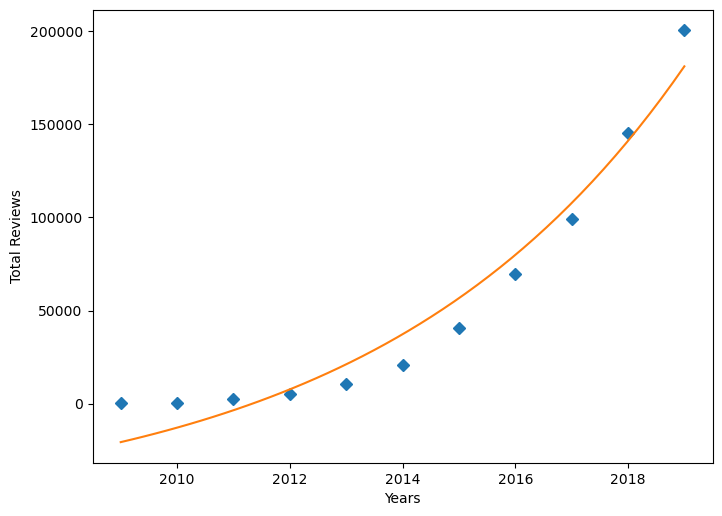

In [39]:

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

In [40]:
# Getting Equation of the Curve
equation_curve_ny = np.polyfit(xData, yData, 2)
equation_curve_ny

array([ 3.10529254e+03, -1.24896667e+07,  1.25585367e+10])

# Data Analysis post-covid19

In [41]:
reviews_ny_2021 = reviews_ny[(reviews_ny['date'] > '2019-12-31') & (reviews_ny['date'] < '2022-01-01')]

In [42]:
reviews_ny_2021["date"] = pd.to_datetime(reviews_ny_2021["date"])

In [43]:
# Generating new columns 'year-month' and 'year'
reviews_ny_2021['ym_date'] = reviews_ny_2021['date'].dt.strftime('%Y-%m')
reviews_ny_2021['year'] = pd.DatetimeIndex(reviews_ny_2021['date']).year
# reviews_ny_2019['month'] = pd.DatetimeIndex(reviews_ny_2019['date']).month
# reviews_ny_2019['ym_date'] = reviews_ny_2019['date'].dt.strftime('%Y-%m')

In [44]:
reviews_ny_2021.head(10)

,listing_id,date,ym_date,year
99,5136,2021-08-08,2021-08,2021
560,5178,2020-01-03,2020-01,2020
561,5178,2020-01-12,2020-01,2020
562,5178,2020-01-28,2020-01,2020
563,5178,2020-02-01,2020-02,2020
564,5178,2020-02-12,2020-02,2020
565,5178,2020-02-16,2020-02,2020
566,5178,2020-02-22,2020-02,2020
567,5178,2020-02-23,2020-02,2020
568,5178,2020-02-27,2020-02,2020


In [45]:
# Getting total reviews count by year
reviews_ny_2021 = reviews_ny_2021.groupby('year')['listing_id'].size().reset_index()

In [46]:
reviews_ny_2021 = reviews_ny_2021.rename(columns={'listing_id':'total_reviews'})

In [47]:
reviews_ny_2021.head()

,year,total_reviews
0,2020,88183
1,2021,209040


In [48]:
x = reviews_ny_2021['year'].values
y = reviews_ny_2021['total_reviews'].values

In [49]:
from numpy import ones,vstack
from numpy.linalg import lstsq
# points = [(2020,10918),(2021,15540)]
# x_coords, y_coords = zip(*points)
A = vstack([x,ones(len(x))]).T
m, c = lstsq(A, y)[0]
print("Line Solution is y = {m}x + {c}".format(m=m,c=c))

Line Solution is y = 120857.00000005259x + -244042957.00010628


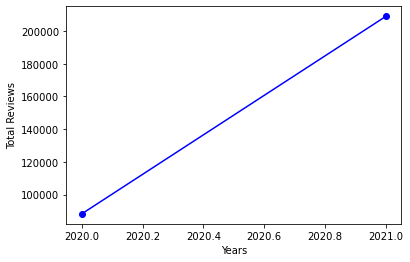

In [50]:
fig, ax = plt.subplots()

ax.plot(x, y, **{'color': 'blue', 'marker': 'o'})
ax.set_xlabel('Years')
ax.set_ylabel('Total Reviews')
plt.show()

In [51]:
import math
import collections


def calculateIntersection(p, l):
  b = p.B - l.slope
  d = p.C - l.yInt

  discriminant = b**2 - (4 * p.A * d)

  if discriminant > 0.0:
    # 2 points of intersection
    x1 = (-b + math.sqrt(discriminant)) / (2.0 * p.A)
    x2 = (-b - math.sqrt(discriminant)) / (2.0 * p.A)

    return discriminant, [(x1, l.slope * x1 + l.yInt), (x2, l.slope * x2 + l.yInt)]

  elif discriminant == 0.0:
    # 1 point of intersection
    x1 = -b / (2.0 * p.A)

    return discriminant, [(x1, slope * x1 + l.yInt)]
  else:
    # no points of intersection
    return discriminant, []



In [52]:
# Intersection between Curve (pre-covid) and line (post covid)

Line = collections.namedtuple('Line', 'slope yInt')
Poly = collections.namedtuple('Poly', 'A B C')

p = Poly(A= equation_curve_ny[0], B=equation_curve_ny[1], C=equation_curve_ny[2])
print(p)

l = Line(slope=m, yInt=c)
print(l)

(discriminant, points) = calculateIntersection(p, l)

if (len(points) > 0):
  print("Intersection: {}".format(points))
else:
  print("No intersection: {}".format(discriminant))

Poly(A=3105.292540476268, B=-12489666.7439467, C=12558536700.964466)
Line(slope=120857.00000005259, yInt=-244042957.00010628)
Intersection: [(2038.1918055723797, 2286790.0460620224), (2022.7858896281623, 424877.26279091835)]


# Time-Series Forecasting (only New York)

In [53]:
# This time reviews count is based on month year
count_ny_2019_ = reviews_ny_2019.groupby('ym_date')['listing_id'].size().reset_index()

In [54]:
# reviews_ny_2019.to_csv (r'D:/airbnb/USA/reviews_ny_2019.csv', index = None, header=True)
count_ny_2019_ = count_ny_2019_.rename(columns={'listing_id':'total_reviews'})

In [55]:
count_ny_2019_.shape

(129, 2)

In [56]:
count_ny_2019_.head(10)

,ym_date,total_reviews
0,2009-04,1
1,2009-05,6
2,2009-06,4
3,2009-07,7
4,2009-08,7
5,2009-09,6
6,2009-10,15
7,2009-11,23
8,2009-12,22
9,2010-01,22


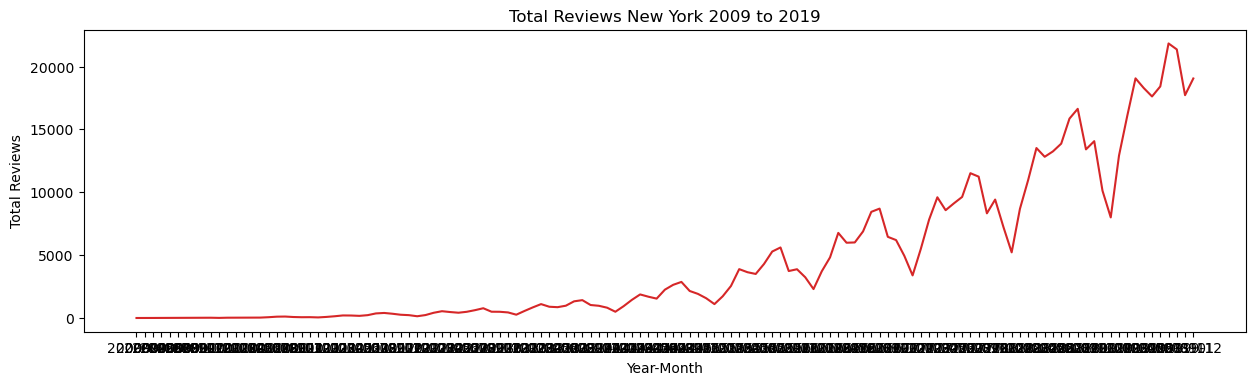

In [57]:
def plot_df(df, x, y, title="", xlabel='Year-Month', ylabel='Total Reviews', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df=count_ny_2019_, x=count_ny_2019_['ym_date'], y=count_ny_2019_['total_reviews'], title='Total Reviews New York 2009 to 2019')

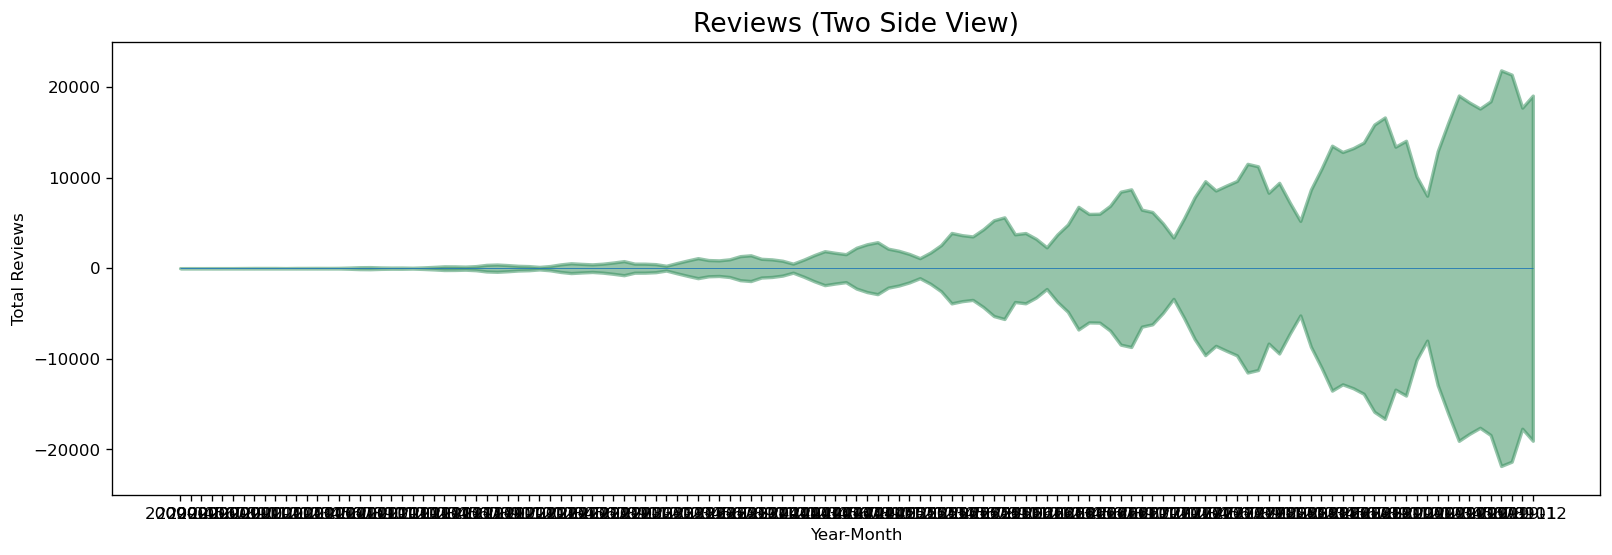

In [58]:
x1 = count_ny_2019_['ym_date'].values
y1 = count_ny_2019_['total_reviews'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x1, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-25000, 25000)
plt.title('Reviews (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(count_ny_2019_['ym_date']), xmax=np.max(count_ny_2019_['ym_date']), linewidth=.5)
plt.gca().set(xlabel='Year-Month', ylabel='Total Reviews')
plt.show()

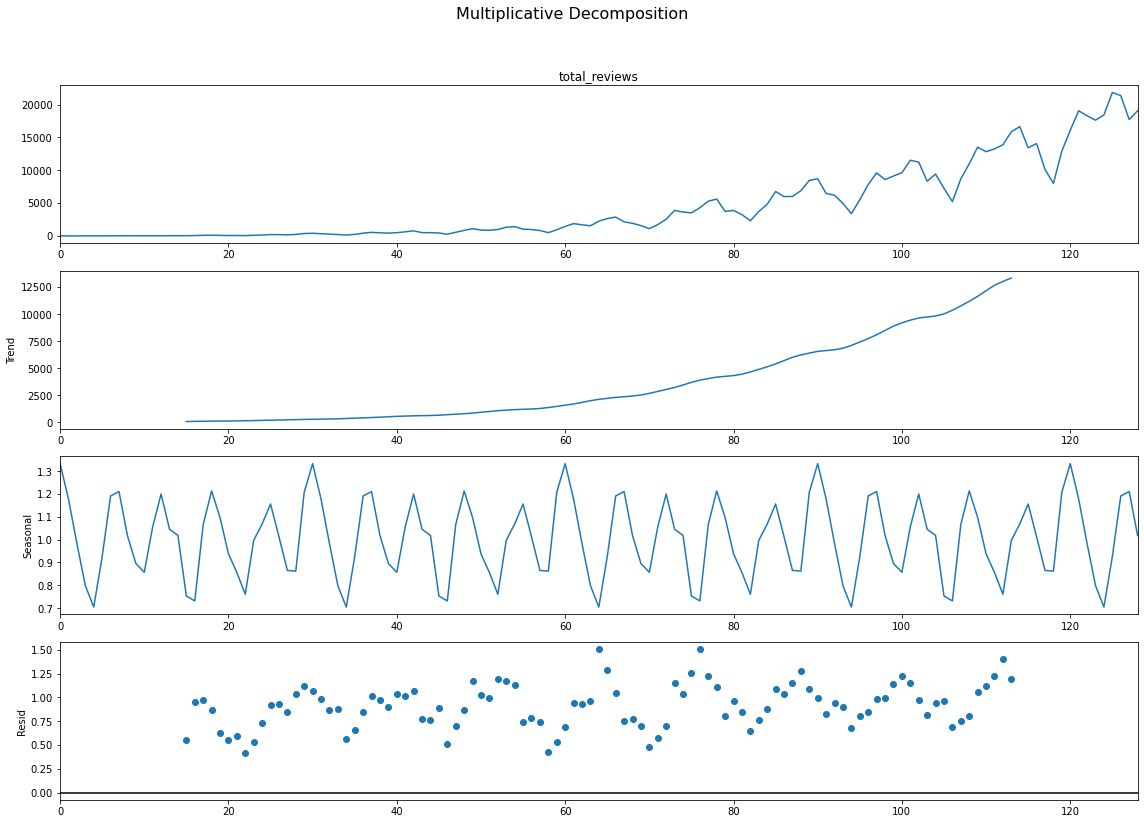

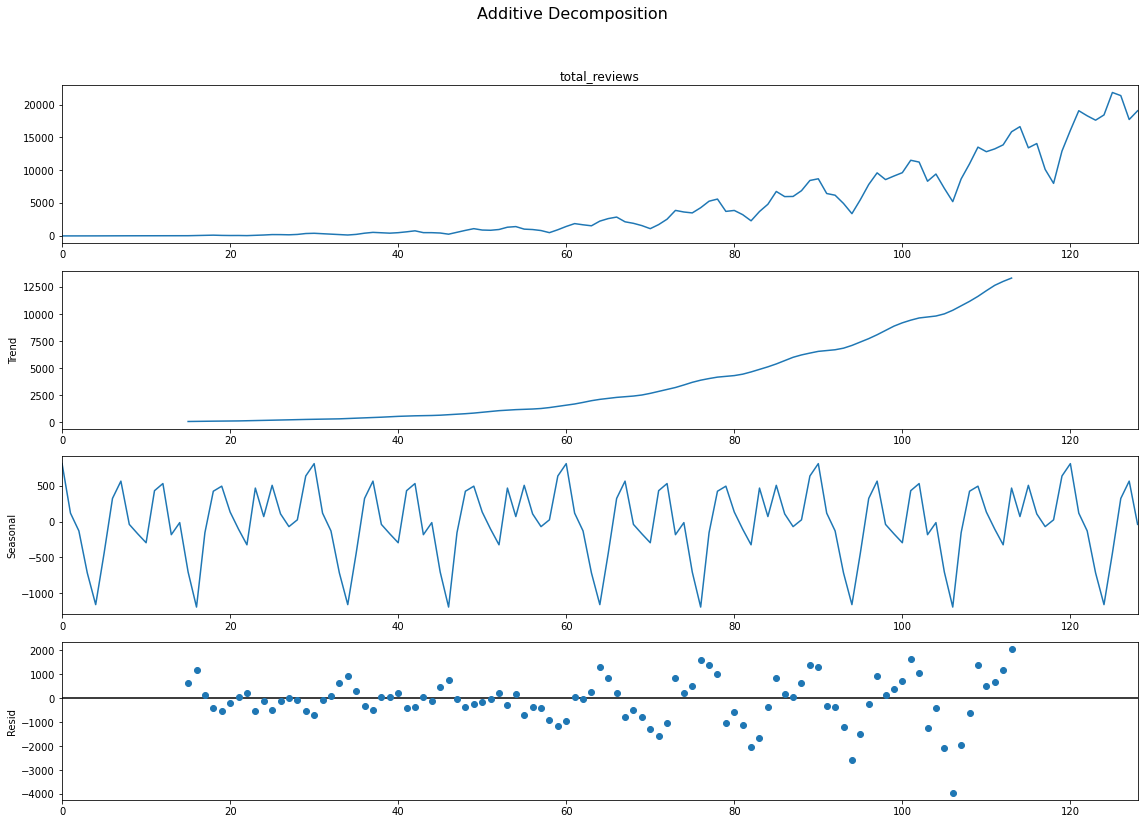

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(count_ny_2019_['total_reviews'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(count_ny_2019_['total_reviews'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Text(0.5, 1.0, 'Reviews detrended by subtracting the least squares fit')

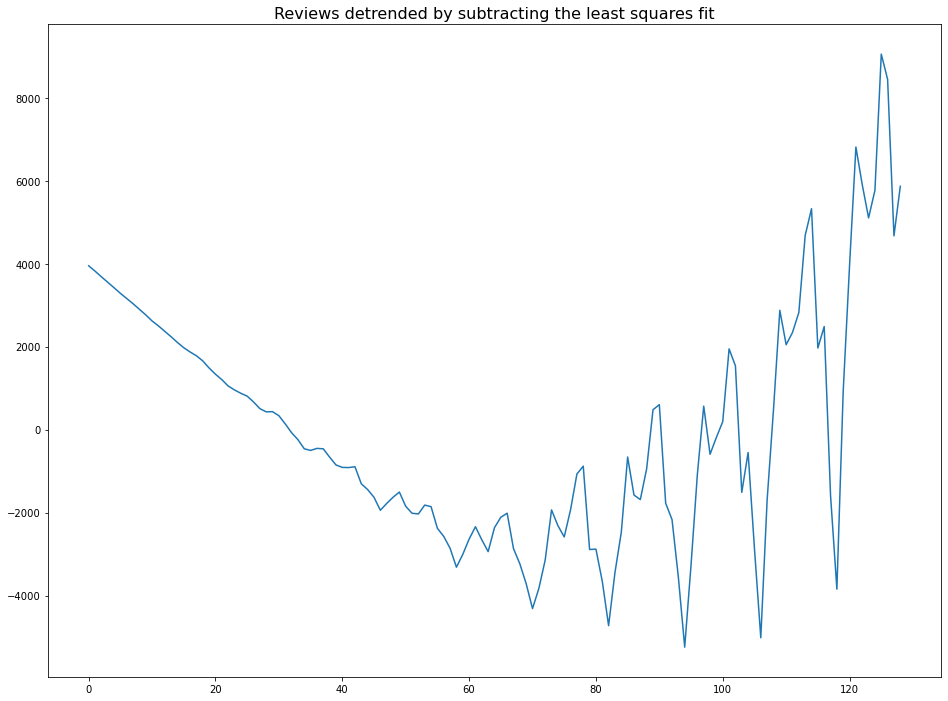

In [60]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(count_ny_2019_['total_reviews'].values)
plt.plot(detrended)
plt.title('Reviews detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Reviews detrended by subtracting the trend component')

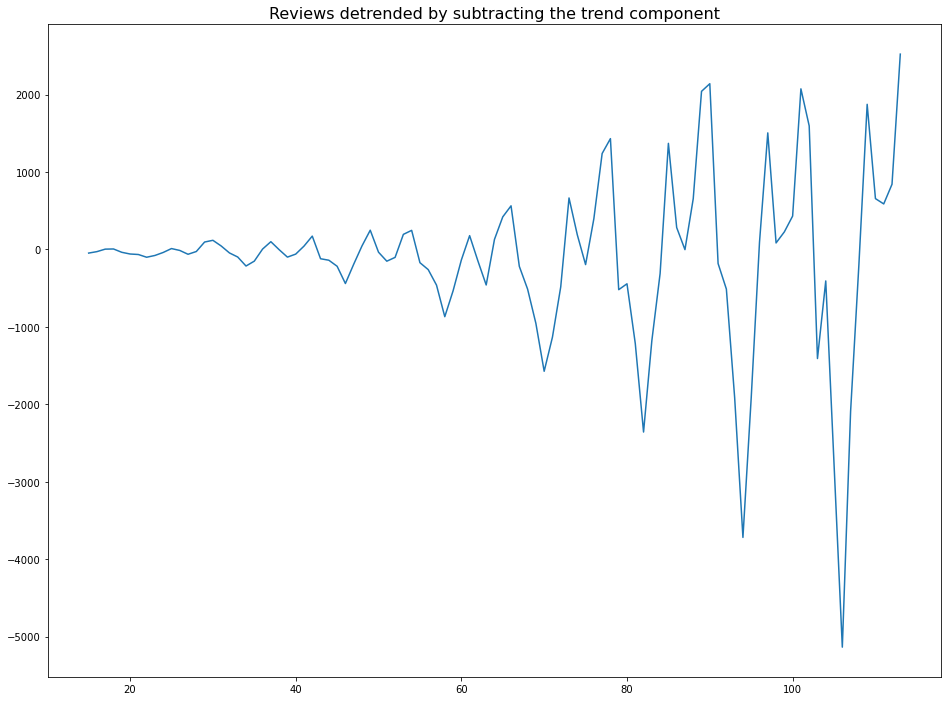

In [61]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(count_ny_2019_['total_reviews'], model='multiplicative', period=30)
detrended = count_ny_2019_['total_reviews'].values - result_mul.trend
plt.plot(detrended)
plt.title('Reviews detrended by subtracting the trend component', fontsize=16)

[]

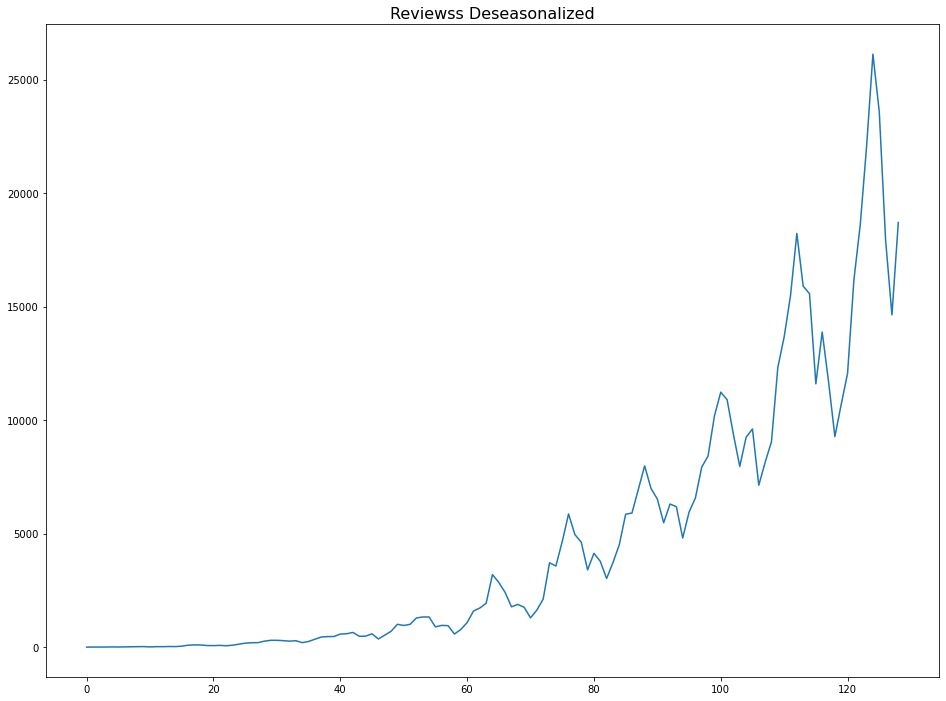

In [62]:
# Subtracting the Trend Component

# Time Series Decomposition
result_mul = seasonal_decompose(count_ny_2019_['total_reviews'], model='multiplicative', period=30)

# Deseasonalize
deseasonalized = count_ny_2019_['total_reviews'].values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Reviewss Deseasonalized', fontsize=16)
plt.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

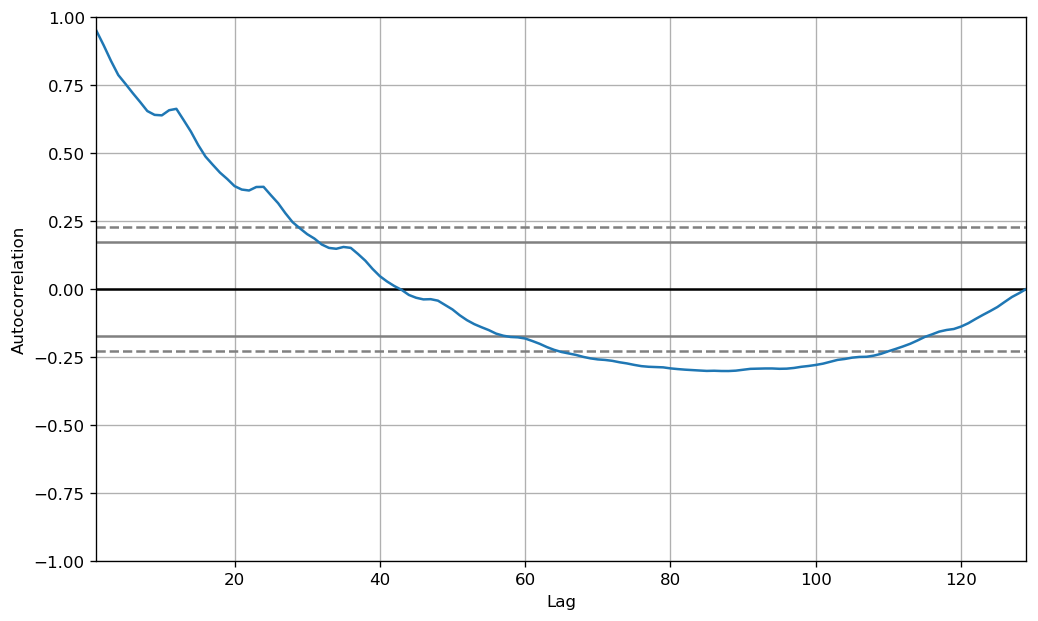

In [63]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(count_ny_2019_['total_reviews'].tolist())

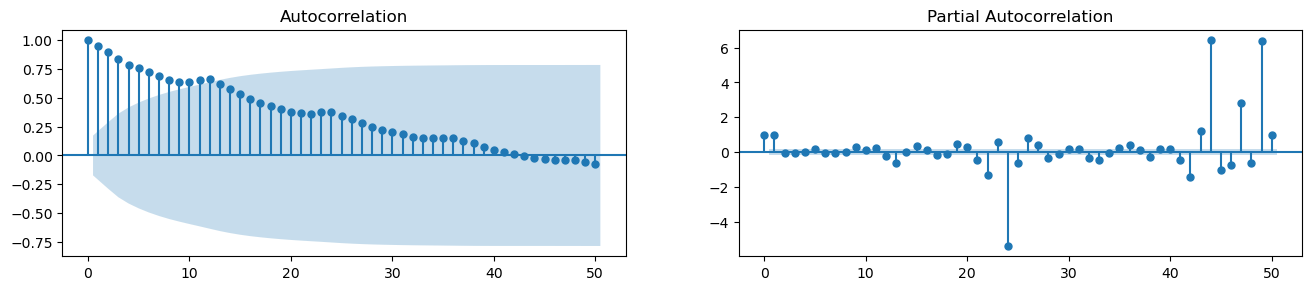

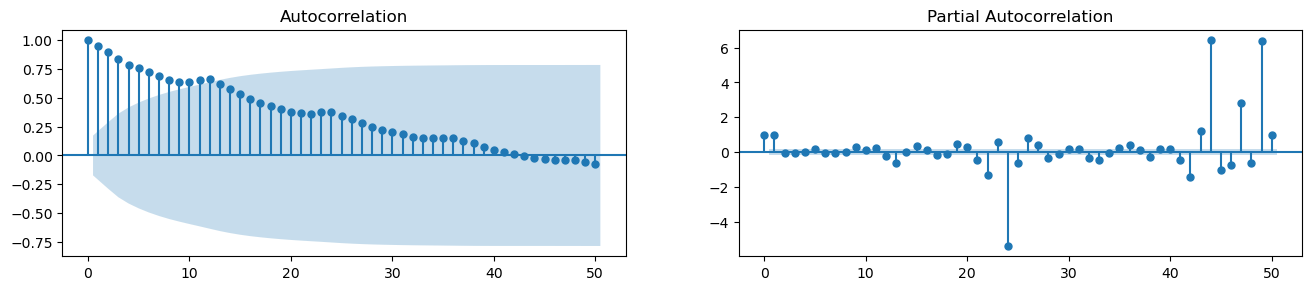

In [64]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(count_ny_2019_['total_reviews'].tolist(), lags=50, ax=axes[0])
plot_pacf(count_ny_2019_['total_reviews'].tolist(), lags=50, ax=axes[1])

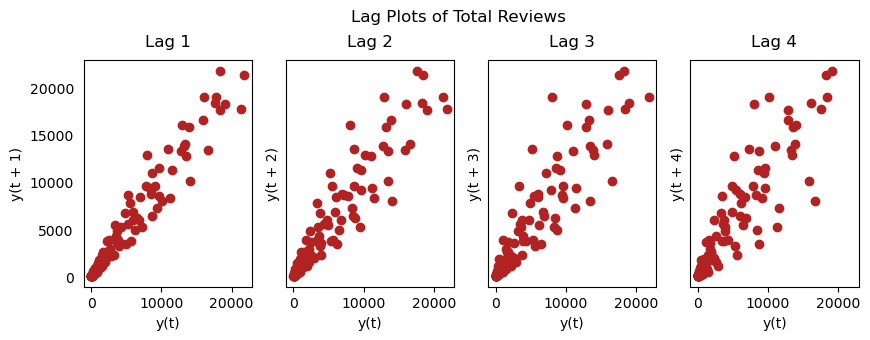

In [65]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(count_ny_2019_['total_reviews'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Total Reviews', y=1.05)    
plt.show()

# ARIMA MODEL

In [66]:
# count_ny_2019_ = reviews_ny_2019.groupby('ym_date')['total_reviews'].size().reset_index()

In [67]:
count_ny_2019_.head()

,ym_date,total_reviews
0,2009-04,1
1,2009-05,6
2,2009-06,4
3,2009-07,7
4,2009-08,7


<AxesSubplot:>

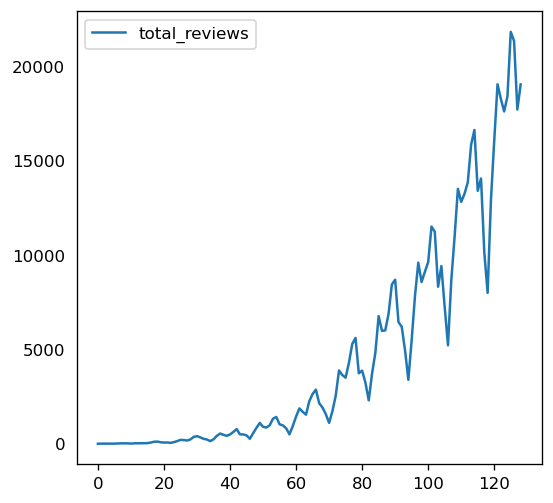

In [68]:
from pylab import rcParams
rcParams['figure.figsize'] =5,5
count_ny_2019_.plot()

In [69]:
from statsmodels.tsa.stattools import adfuller

In [70]:
test_results = adfuller(count_ny_2019_['total_reviews'])

In [71]:
#Ho: It is Not Stattionary
#HA : It is Stationary

def adfuller_test (reviews):
    result = adfuller(reviews)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+':'+ str(value))
    if(result[1]<=0.05):
        print("Stationary")
    else:
        print("Not Stationary")

In [72]:
adfuller_test(count_ny_2019_['total_reviews'])

ADF Test Statistic:2.9601569327345274
p-value:1.0
#Lags Used:12
Number of Observations Used:116
Not Stationary


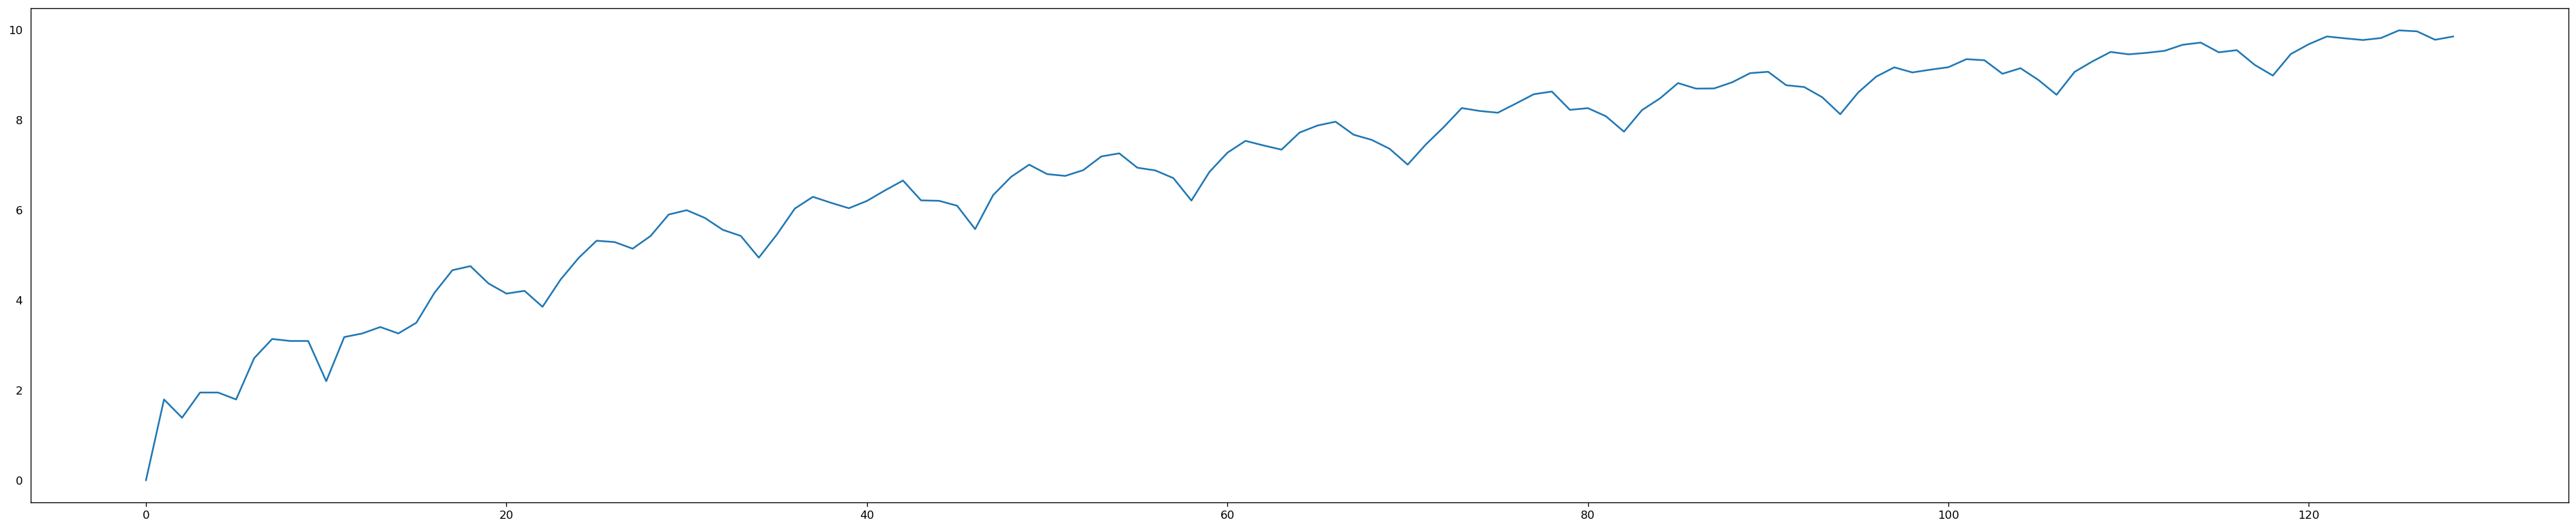

In [73]:
plt.figure(figsize=(40,8))
plt.plot(np.log(count_ny_2019_['total_reviews']))

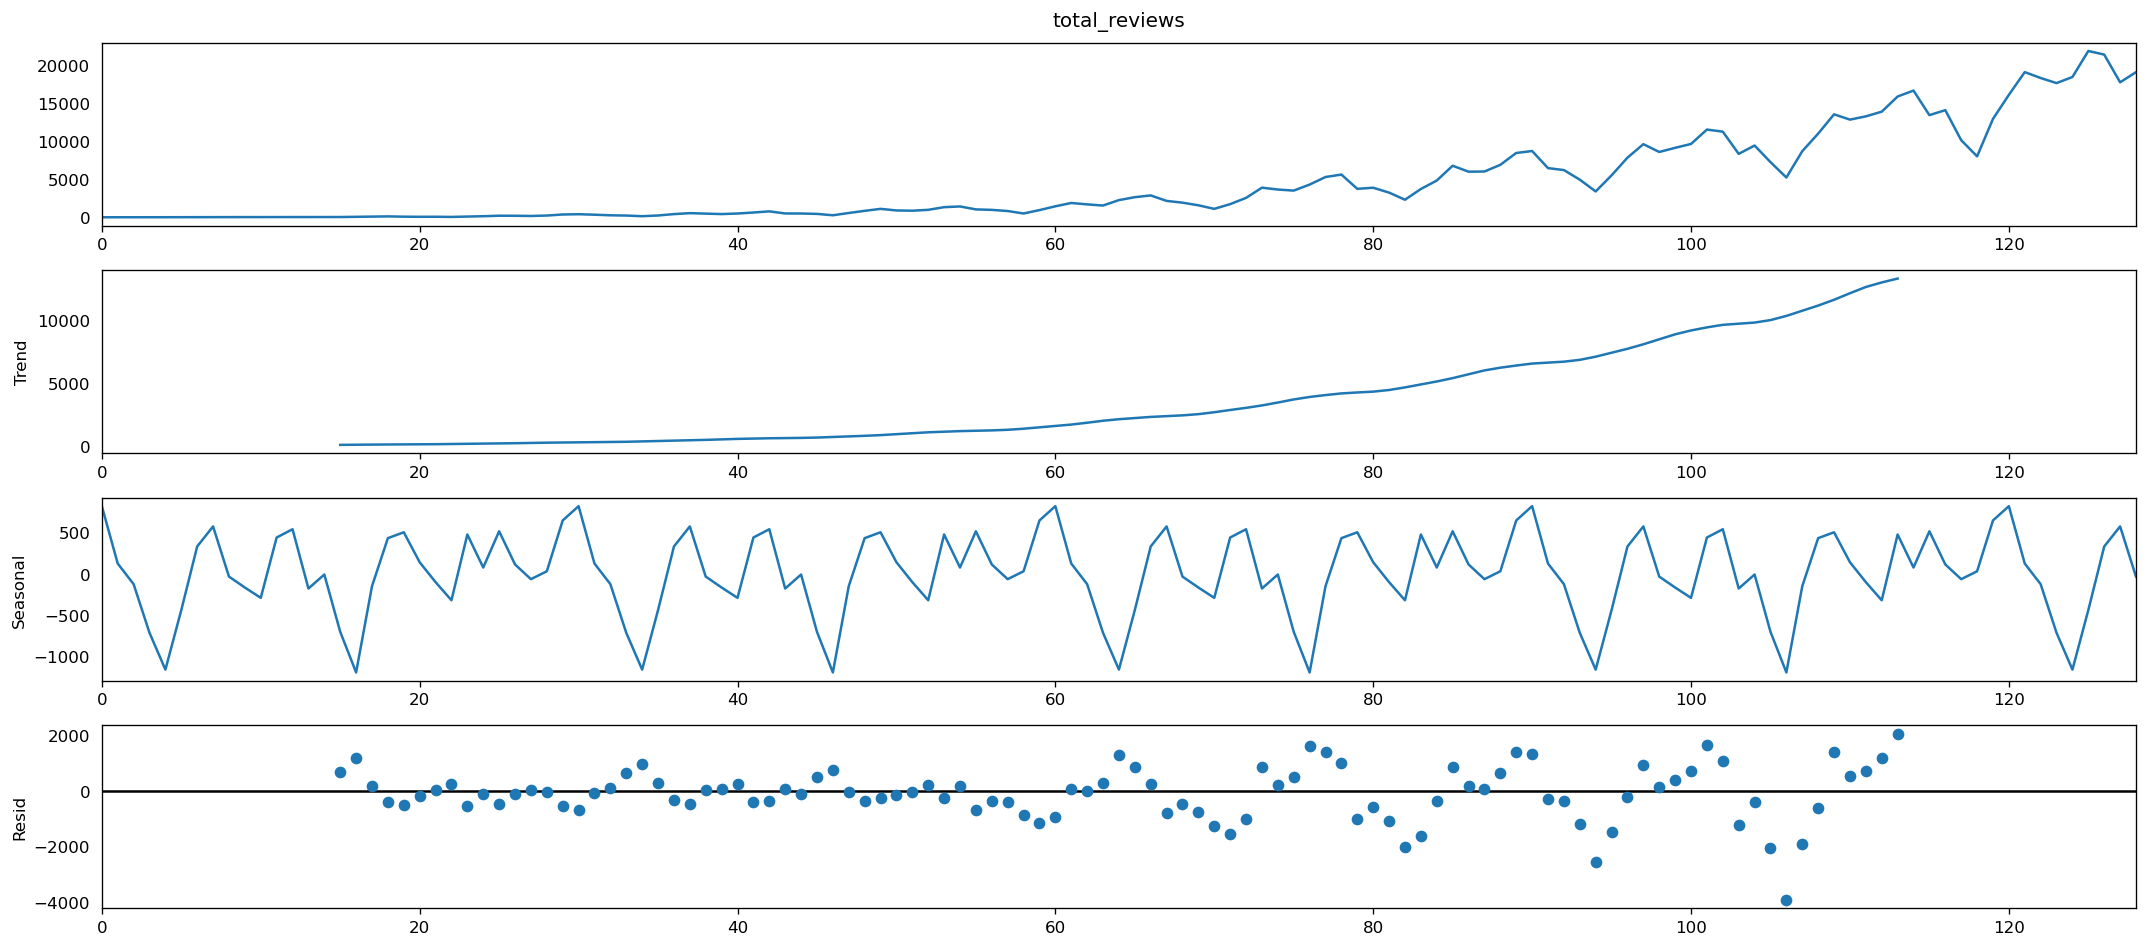

In [74]:
from pylab import rcParams
import statsmodels.api as sm
import itertools
rcParams['figure.figsize'] =18,8
decomposition = seasonal_decompose(count_ny_2019_['total_reviews'],model='additive', period=30)
fig = decomposition.plot()
plt.show()

In [75]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

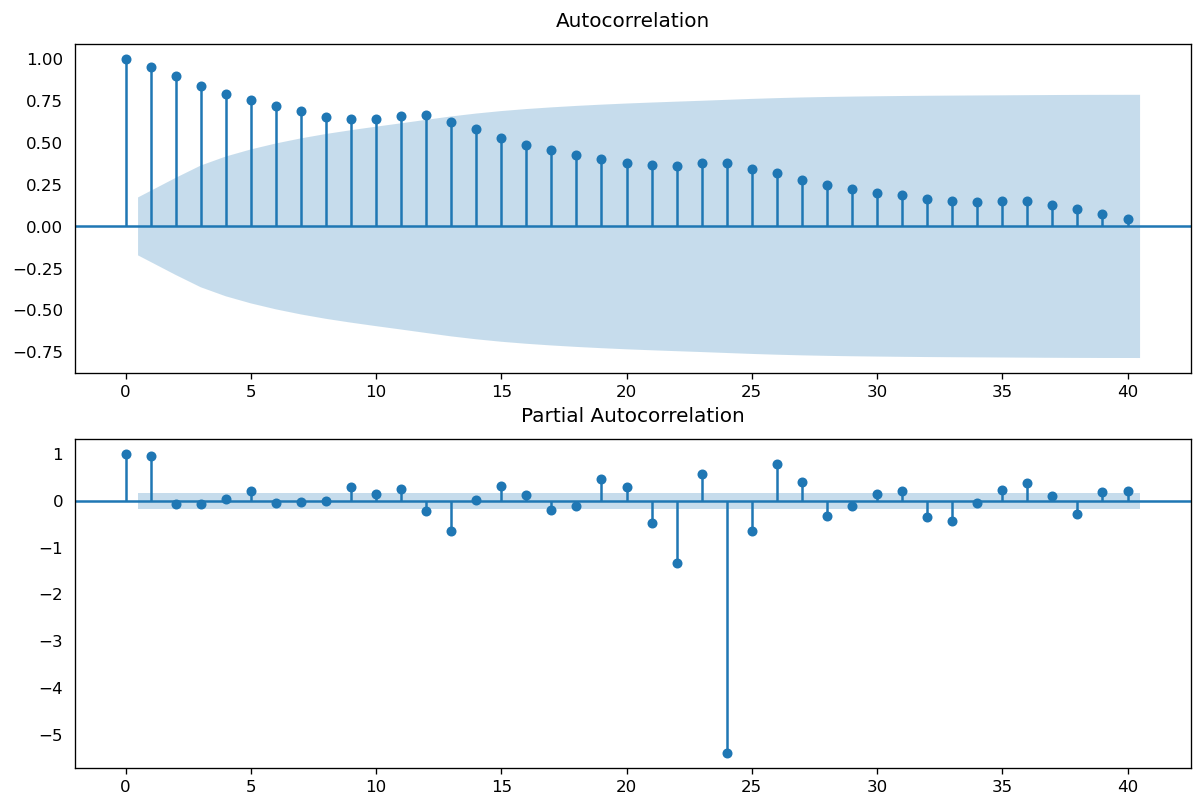

In [76]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(count_ny_2019_['total_reviews'],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(count_ny_2019_['total_reviews'],lags=40,ax=ax2)

In [77]:
from statsmodels.tsa.arima_model import ARIMA

In [78]:
p = q = d = range(0,2)
pdq = list(itertools.product(p,d,q))

In [79]:
for param in pdq:
        try:
            model=ARIMA(count_ny_2019_['total_reviews'].dropna(),order=param)
            results=model.fit()
            print('ARIMA{}- AIC:{}'.format(param,results.aic))
        except:
            continue

ARIMA(0, 0, 0)- AIC:2602.9689749182644
ARIMA(0, 0, 1)- AIC:2447.95134237098
ARIMA(0, 1, 0)- AIC:2191.7830814102394
ARIMA(0, 1, 1)- AIC:2189.550415928171
ARIMA(1, 0, 0)- AIC:2215.8120857189447
ARIMA(1, 0, 1)- AIC:2212.593432740658
ARIMA(1, 1, 0)- AIC:2191.258236509983
ARIMA(1, 1, 1)- AIC:2179.0166425383295


In [80]:
model = ARIMA(count_ny_2019_['total_reviews'].dropna(),order=(0,0,1))

In [81]:
results=model.fit()
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,4649.7298,530.447,8.766,0.000,3610.072,5689.387
ma.L1.total_reviews,0.9560,0.021,44.561,0.000,0.914,0.998


In [82]:
count_ny_2019_

,ym_date,total_reviews
0,2009-04,1
1,2009-05,6
2,2009-06,4
3,2009-07,7
4,2009-08,7
...,...,...
124,2019-08,18415
125,2019-09,21833
126,2019-10,21359
127,2019-11,17720


In [83]:
from dateutil.parser import parse

def is_date(string, fuzzy=False):
    """
    Return whether the string can be interpreted as a date.

    :param string: str, string to check for date
    :param fuzzy: bool, ignore unknown tokens in string if True
    """
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False

In [84]:
# count_ny_2019_["ym_date"] = pd.to_datetime(count_ny_2019_["ym_date"])
is_date(count_ny_2019_["ym_date"][0])

True

In [85]:
count_ny_2019_.isnull().values.any()

False

In [86]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(count_ny_2019_.total_reviews.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 2.960157
p-value: 1.000000


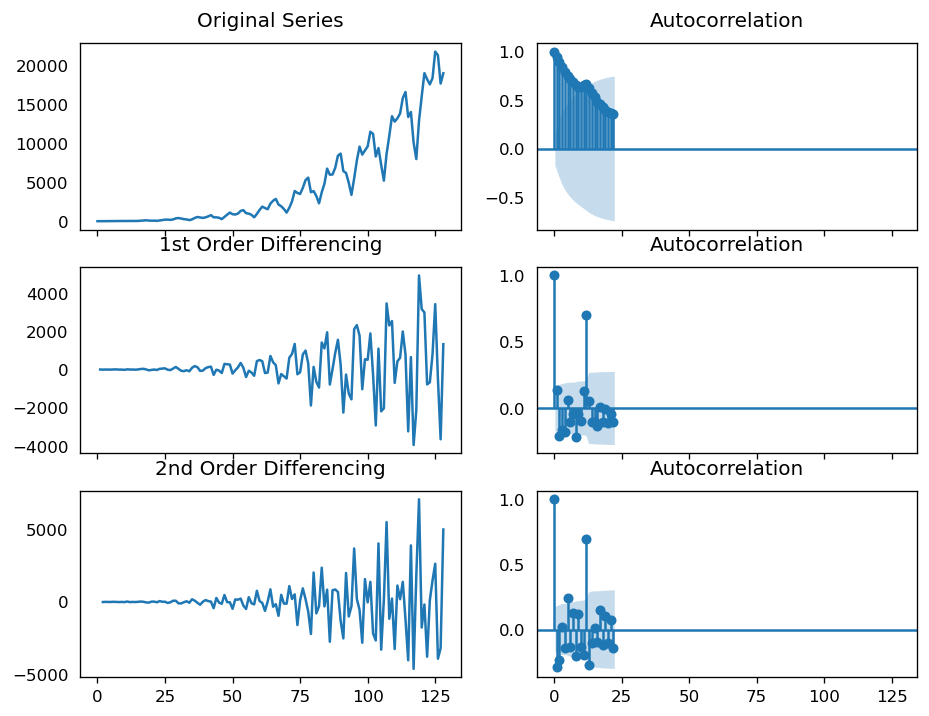

In [87]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(count_ny_2019_.total_reviews); axes[0, 0].set_title('Original Series')
plot_acf(count_ny_2019_.total_reviews, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(count_ny_2019_.total_reviews.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(count_ny_2019_.total_reviews.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(count_ny_2019_.total_reviews.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(count_ny_2019_.total_reviews.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

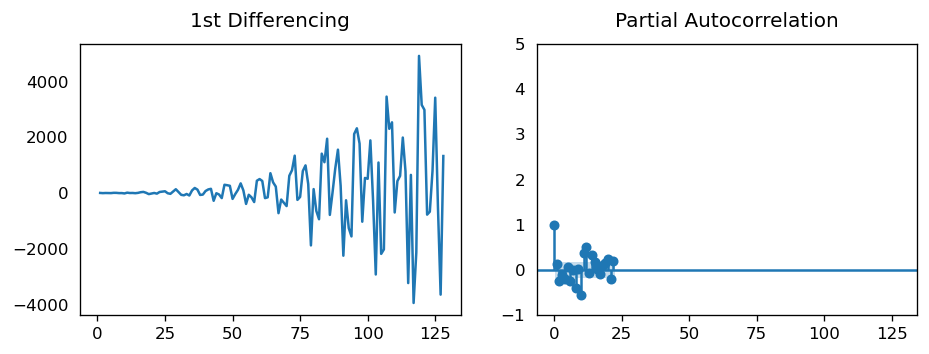

In [88]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(count_ny_2019_.total_reviews.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(-1,5))
plot_pacf(count_ny_2019_.total_reviews.diff().dropna(), ax=axes[1])

plt.show()

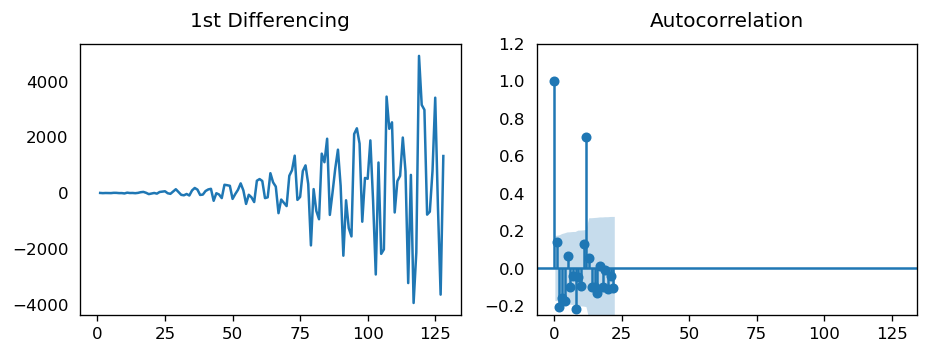

In [89]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(count_ny_2019_.total_reviews.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(-0.25,1.2))
plot_acf(count_ny_2019_.total_reviews.diff().dropna(), ax=axes[1])

plt.show()

In [90]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(count_ny_2019_.total_reviews, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.total_reviews   No. Observations:                  128
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1083.894
Method:                       css-mle   S.D. of innovations           1147.555
Date:                Wed, 19 Oct 2022   AIC                           2177.787
Time:                        02:56:17   BIC                           2192.047
Sample:                             1   HQIC                          2183.581
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   154.1435     53.653      2.873      0.004      48.986     259.301
ar.L1.D.total_reviews     0.1544      0.166      0.929      0.353      -0.171       0.480
ma.L1.D.

In [91]:
# 1,1,1 ARIMA Model
model = ARIMA(count_ny_2019_.total_reviews, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.total_reviews   No. Observations:                  128
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1085.508
Method:                       css-mle   S.D. of innovations           1164.003
Date:                Wed, 19 Oct 2022   AIC                           2179.017
Time:                        02:56:17   BIC                           2190.425
Sample:                             1   HQIC                          2183.652
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   150.6073    122.888      1.226      0.220     -90.248     391.463
ar.L1.D.total_reviews    -0.5772      0.094     -6.130      0.000      -0.762      -0.393
ma.L1.D.

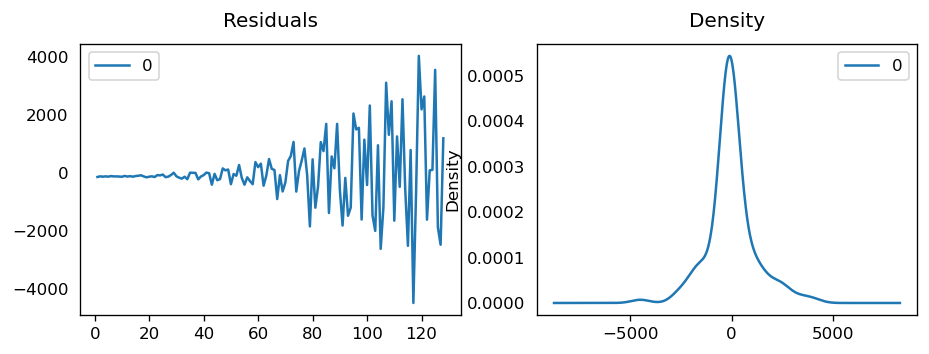

In [92]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

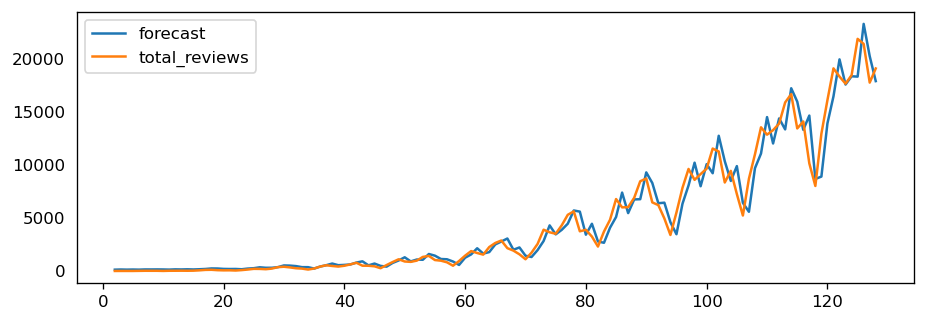

In [93]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [94]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = count_ny_2019_.total_reviews[:round(0.7*len(count_ny_2019_))]
test = count_ny_2019_.total_reviews[round(0.7*len(count_ny_2019_)):]

In [95]:
test.shape

(39,)

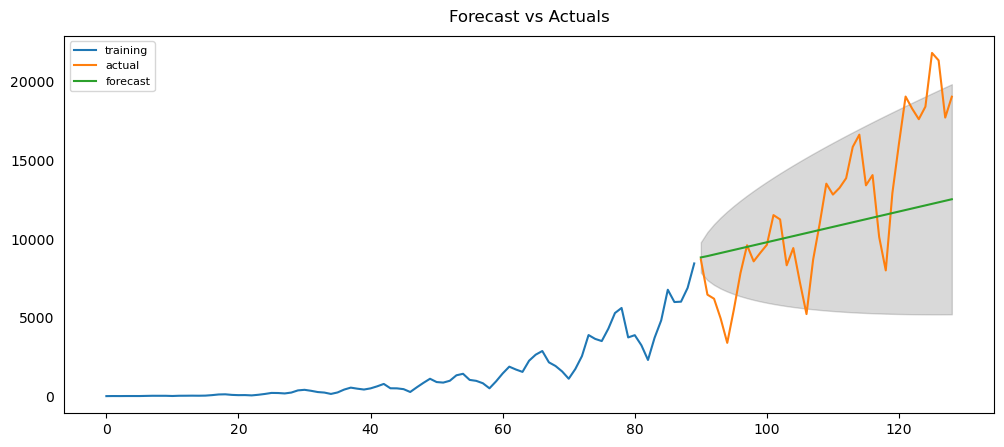

In [96]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(39, alpha=0.05)  # 95% conf and 39 as number of rows for test

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [97]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.3148004996809193,
 'me': -1290.2808189549046,
 'mae': 3335.0793690250225,
 'mpe': 0.04292589766770112,
 'rmse': 4125.544463588836,
 'acf1': 0.8285655800476923,
 'corr': 0.861468325482888,
 'minmax': 0.24066161922122387}

In [98]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

In [99]:
model = pm.auto_arima(count_ny_2019_.total_reviews, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2179.164, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2191.783, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2191.248, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2189.530, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2191.602, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2180.048, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2177.639, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2176.338, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2178.109, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2180.293, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2178.726, Time=0.10 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.490 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  

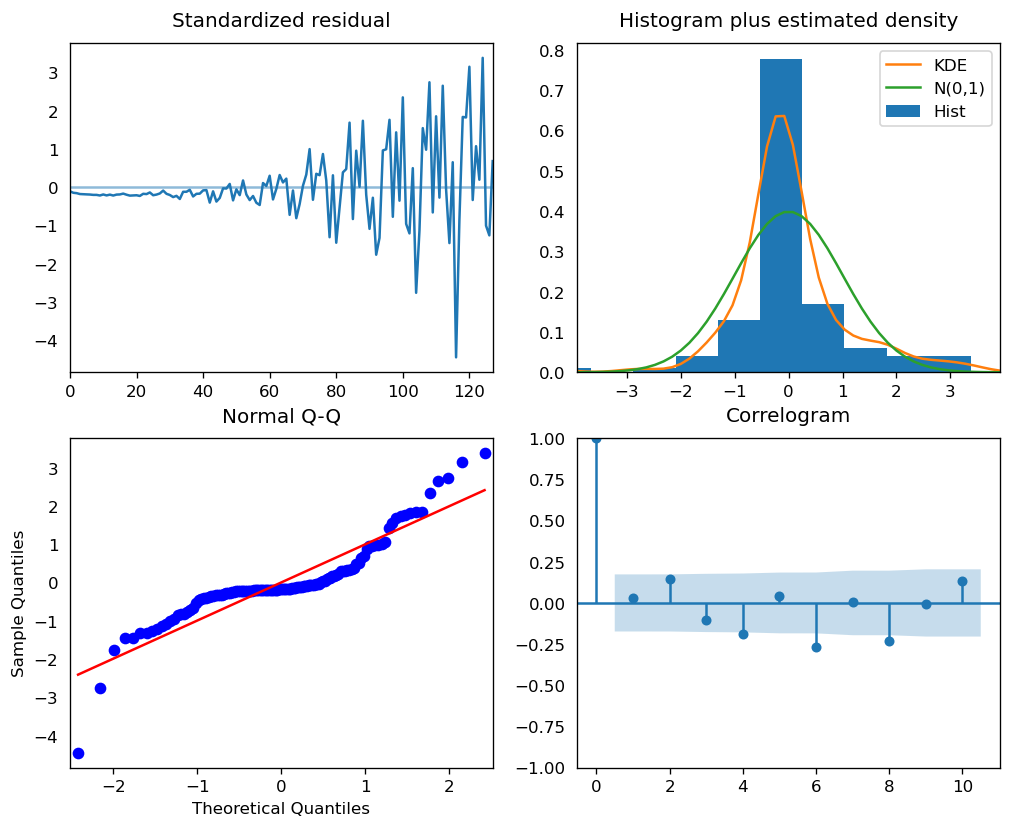

In [100]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

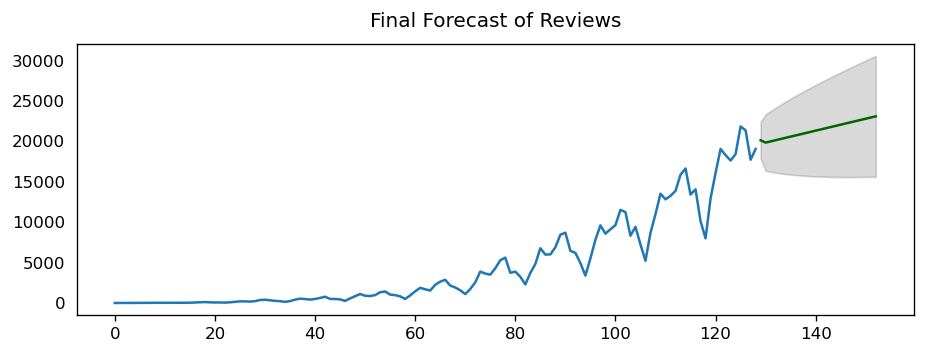

In [101]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(count_ny_2019_.total_reviews), len(count_ny_2019_.total_reviews)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(count_ny_2019_.total_reviews)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Reviews")
plt.show()

# SARIMA MODEL PART 1

In [102]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# 1,1,2 ARIMA Model
model = SARIMAX(count_ny_2019_.total_reviews, order=(1,1,2), seasonal_order=(0, 1, 2, 4))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                     total_reviews   No. Observations:                  129
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 4)   Log Likelihood               -1022.524
Date:                           Wed, 19 Oct 2022   AIC                           2057.048
Time:                                   02:56:38   BIC                           2073.970
Sample:                                        0   HQIC                          2063.922
                                           - 129                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5188      0.105      4.924      0.000       0.312       0.725
ma.L1         -0.5192      0.096     -5.385

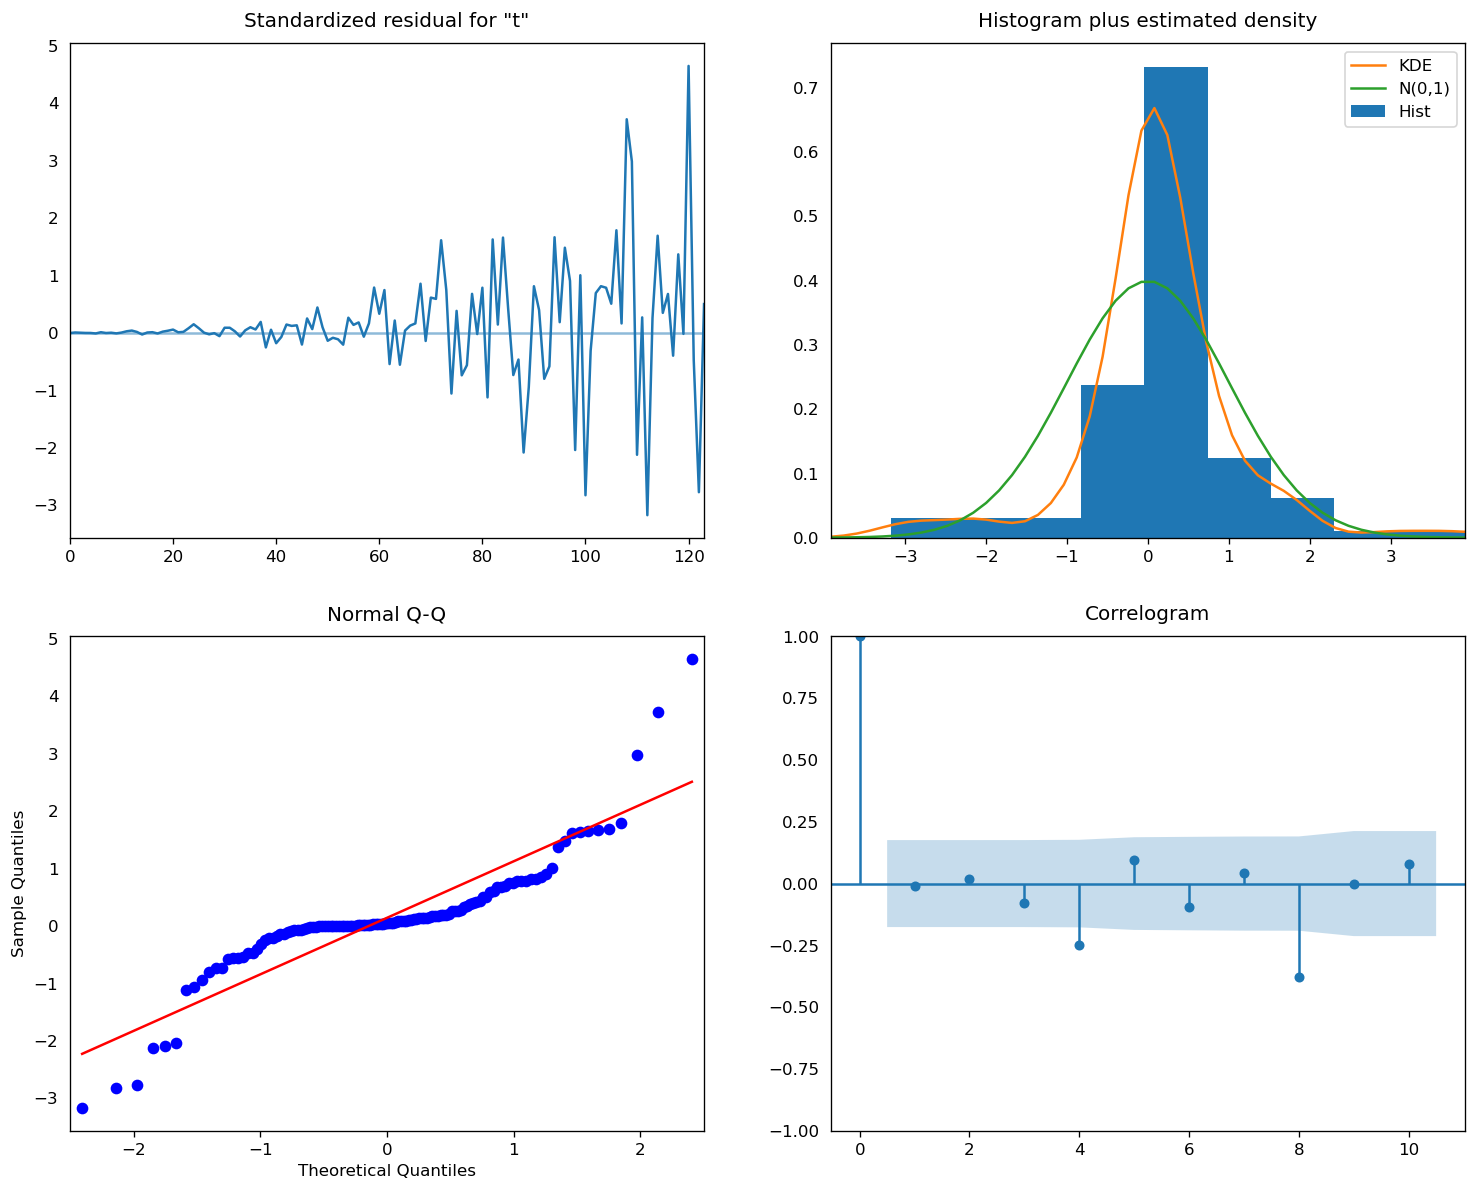

In [103]:
model_fit.plot_diagnostics(figsize=(15,12));

In [104]:
# writing reviews file for tableau visualisation
###### count_ny_2019_.to_csv (r'D:/airbnb/USA/count_ny_2019_.csv', index = None, header=True)

In [105]:
ts = pd.read_csv(os.path.join('D:/airbnb/USA/count_ny_2019_.csv'),parse_dates=["ym_date"], index_col="ym_date")
display(ts.shape)
print(ts.head())
print('Timeseries Range => ', ts.index.min(), ' - ' , ts.index.max())

(129, 1)

            total_reviews
ym_date                  
2009-04-01              1
2009-05-01              6
2009-06-01              4
2009-07-01              7
2009-08-01              7
Timeseries Range =>  2009-04-01 00:00:00  -  2019-12-01 00:00:00


In [106]:
count_ny_2019_.head(10)

,ym_date,total_reviews
0,2009-04,1
1,2009-05,6
2,2009-06,4
3,2009-07,7
4,2009-08,7
5,2009-09,6
6,2009-10,15
7,2009-11,23
8,2009-12,22
9,2010-01,22


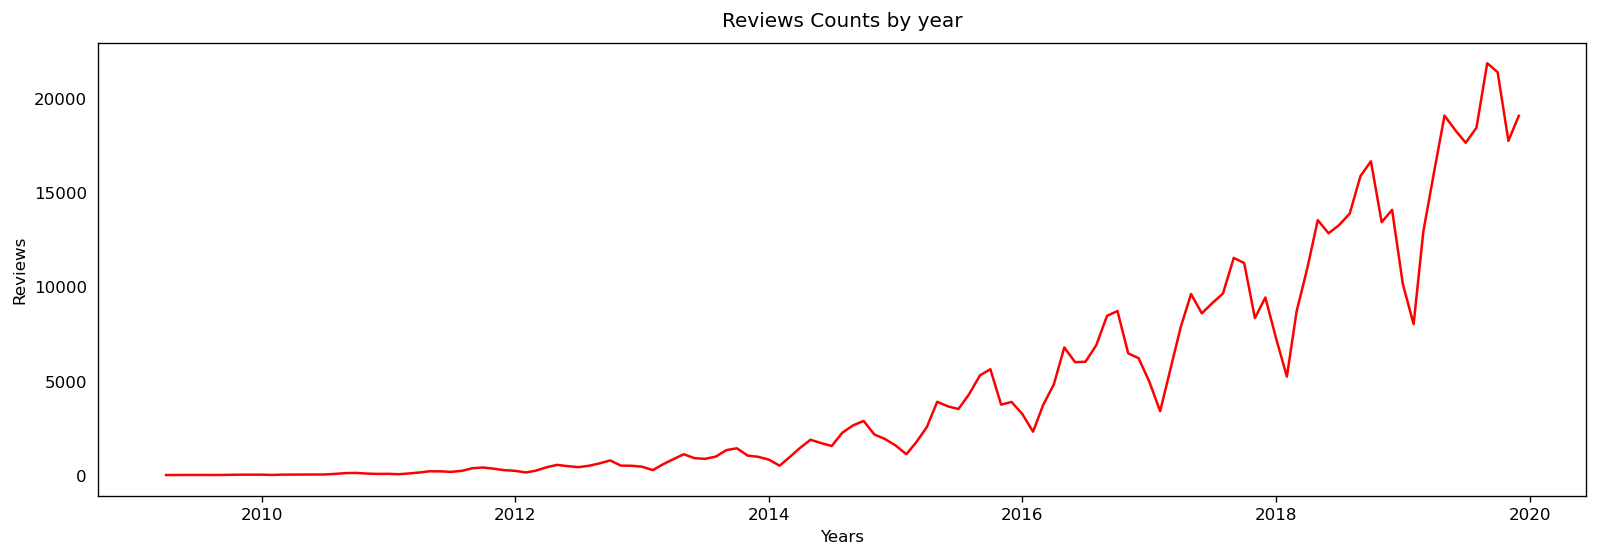

In [109]:
def draw_ts_plot(timeseries, xlabel ='Date', ylabel ='Value', title ="", dpi=120):
    plt.figure(figsize=(16,5),dpi=dpi)
    plt.plot(timeseries, color='red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

draw_ts_plot(ts, xlabel="Years", ylabel = "Reviews", title="Reviews Counts by year")

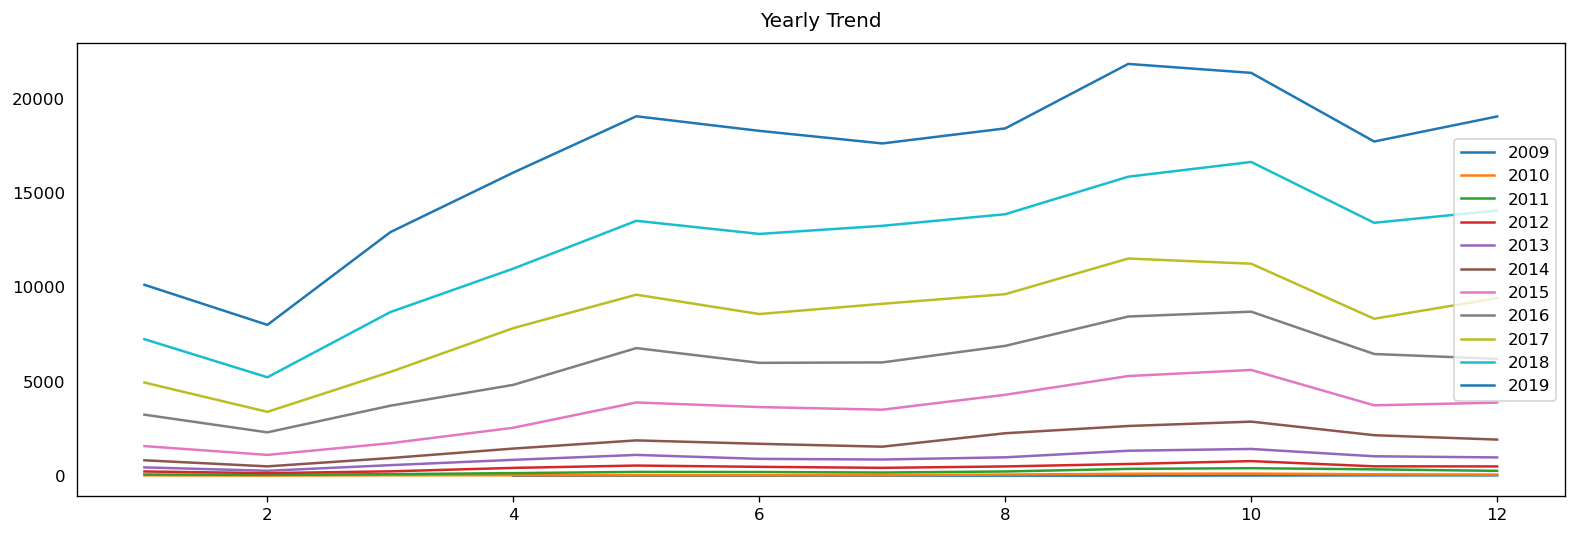

In [110]:
years = ts.index.year.unique()
plt.figure(figsize=(16,5),dpi=120)
for year in years:
    plt.plot(ts.index[ts.index.year == year].month,
    ts[ts.index.year == year]['total_reviews'], label = year )

plt.gca().set(title = "Yearly Trend")
plt.legend(loc='right')
plt.show()

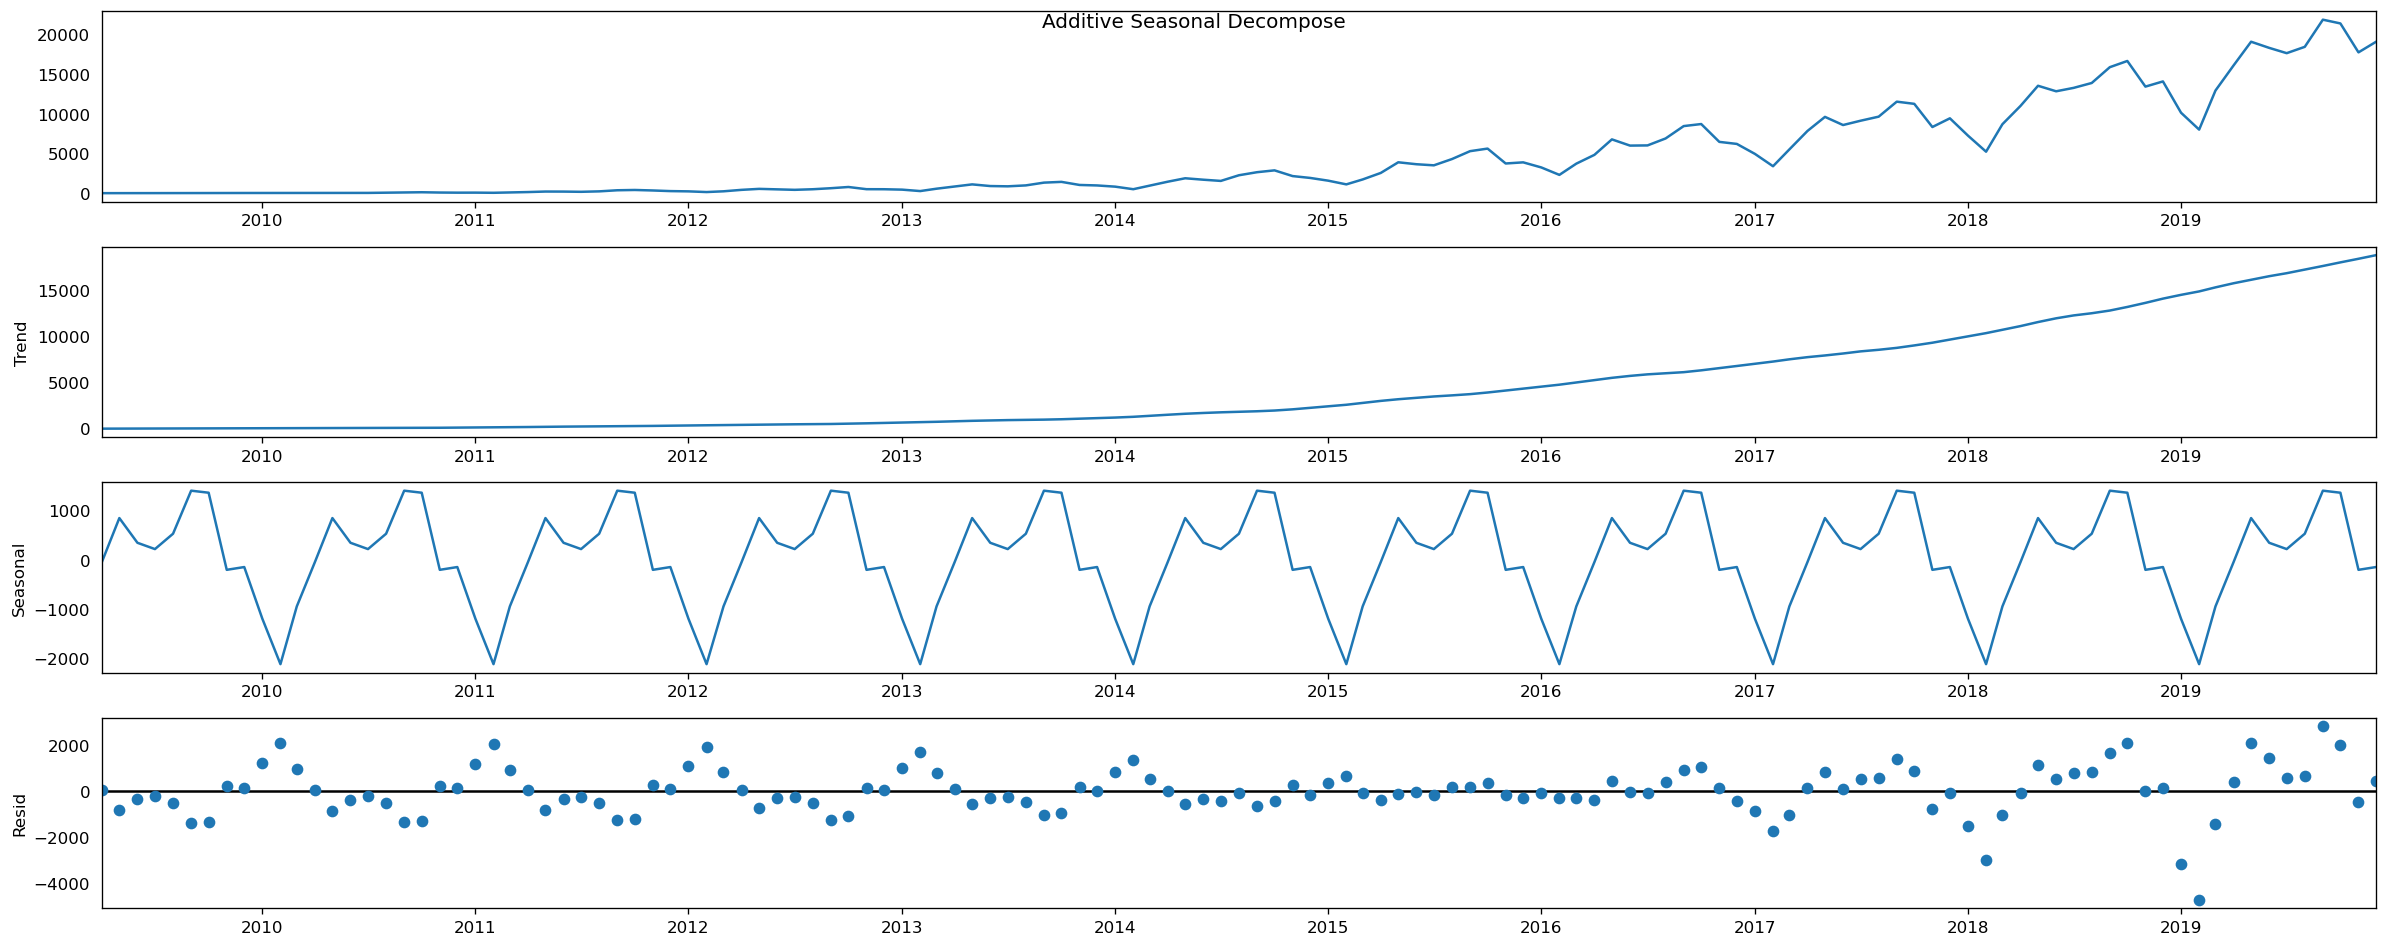

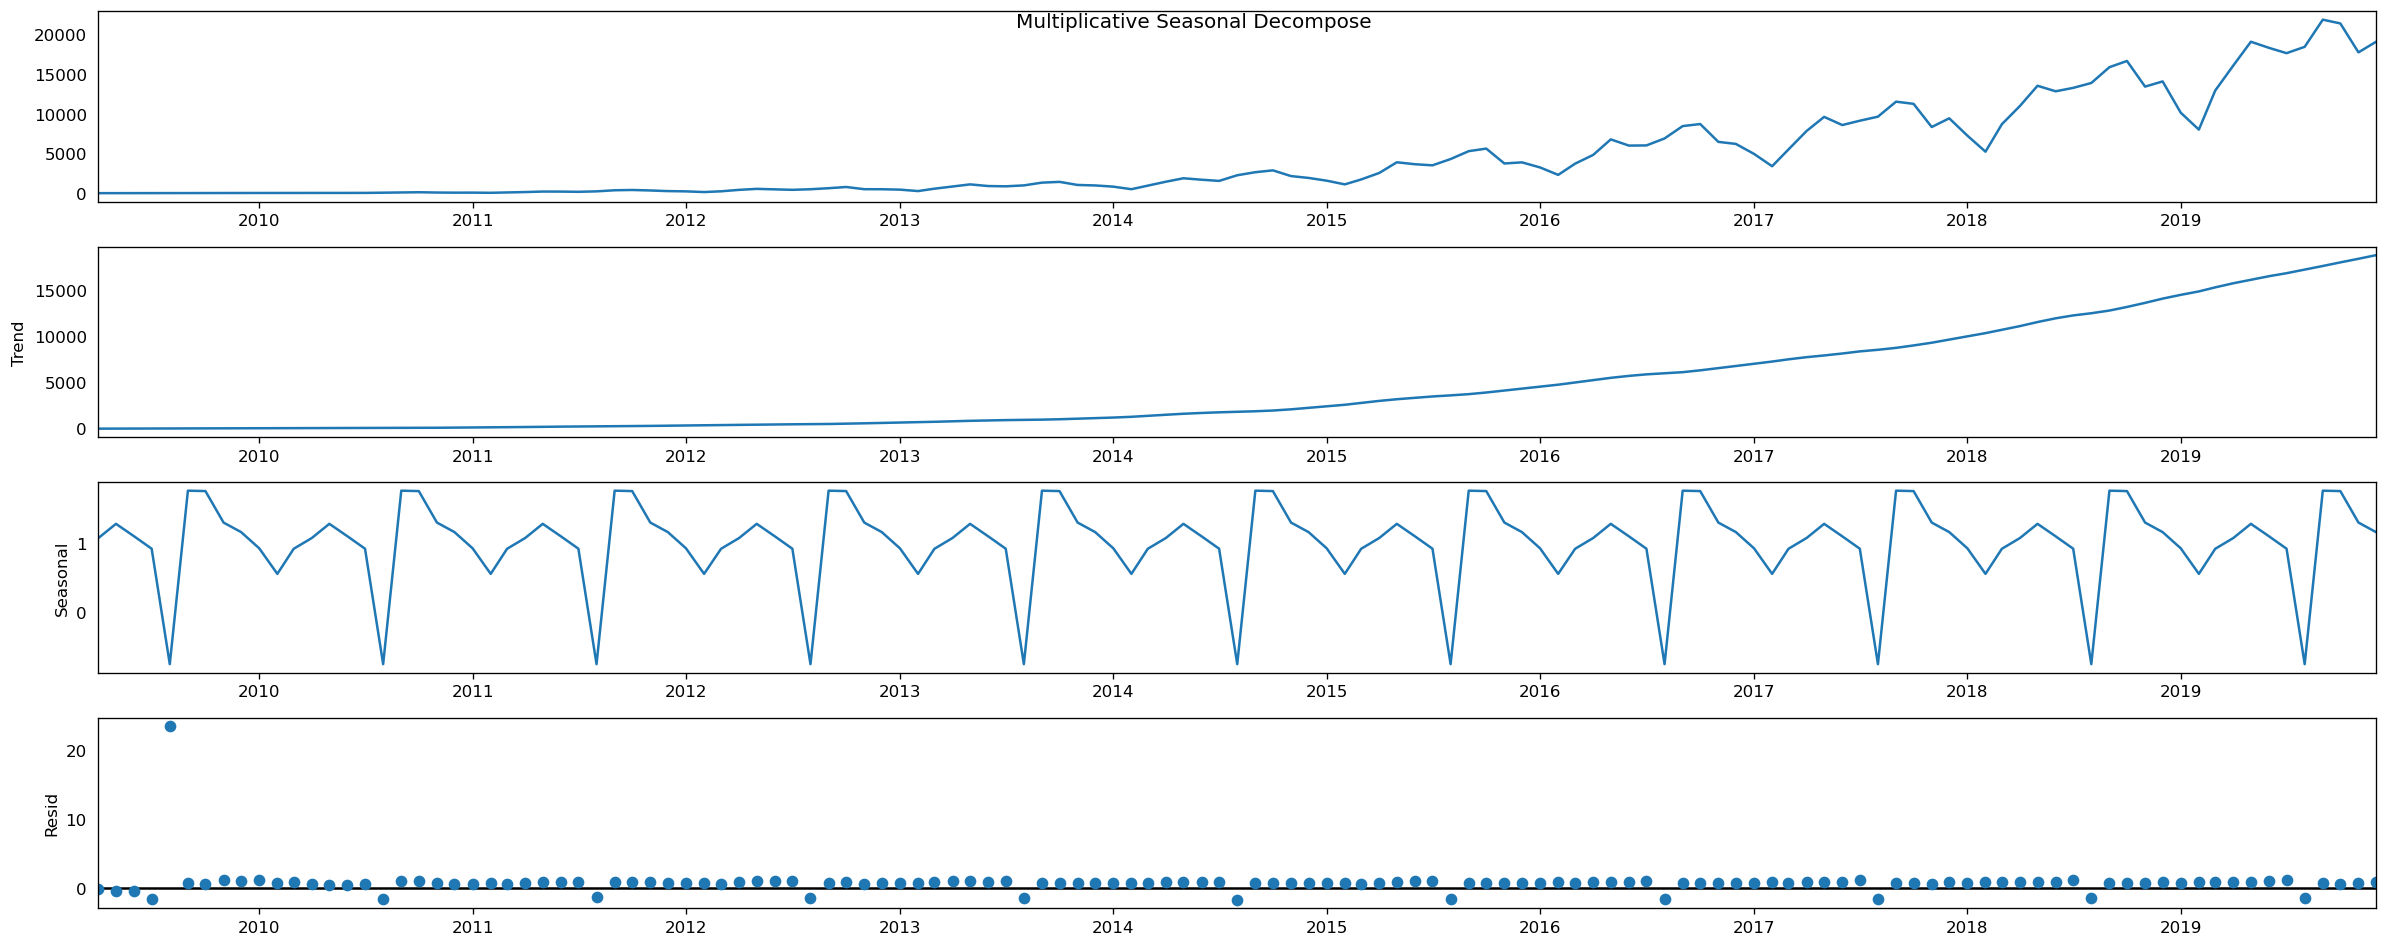

In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose

# additive decomposition
result_additive = seasonal_decompose(ts,model='additive', extrapolate_trend='freq')

# multiplicative
result_multiplicative = seasonal_decompose(ts,model='multiplicative', extrapolate_trend='freq')

# plot
plt.rcParams.update({'figure.figsize':(20,8)})
result_additive.plot()
plt.suptitle('Additive Seasonal Decompose', fontsize=12)
plt.show()

result_multiplicative.plot()
plt.suptitle('Multiplicative Seasonal Decompose', fontsize=12)
plt.show()

In [112]:
df_multiplicative = pd.concat([
    result_multiplicative.observed, 
    result_multiplicative.trend, 
    result_multiplicative.seasonal, 
    result_multiplicative.resid], axis= 1)
df_multiplicative.columns  = ['actual', 'trend','seasonal','resid']
df_multiplicative.head()

,actual,trend,seasonal,resid
ym_date,,,,
2009-04-01,1.0,-18.938034,1.075686,-0.049088
2009-05-01,6.0,-14.301816,1.281441,-0.327387
2009-06-01,4.0,-9.665598,1.100025,-0.376208
2009-07-01,7.0,-5.029380,0.919938,-1.512952
2009-08-01,7.0,-0.393162,-0.758047,23.487126


In [113]:
ts.shape

(129, 1)

In [114]:
train = ts[0:-26]
test = ts[-26:]
print('Train Timeseries Range => ', train.index.min(), ' - ' , train.index.max())
print('Train Timeseries Range => ', test.index.min(), ' - ' , test.index.max())

Train Timeseries Range =>  2009-04-01 00:00:00  -  2017-10-01 00:00:00
Train Timeseries Range =>  2017-11-01 00:00:00  -  2019-12-01 00:00:00


In [115]:
# regression{“c”,”ct”,”ctt”,”nc”}
# Constant and trend order to include in regression.

# “c” : constant only (default).
# “ct” : constant and trend.
# “ctt” : constant, and linear and quadratic trend.
# “nc” : no constant, no trend.

for reg in ["c","ct","ctt","nc"]:
    res = sm.tsa.adfuller(train.dropna(),regression=reg)
    print('Reg - {}\t adf :{} - lag used : {}, Critical value : {}'.format(reg, res[0],res[2],res[4]))
    res = sm.tsa.adfuller(train.diff().dropna(),regression=reg)
    print('Reg diff - {}\t adf :{} - lagused : {}, Critical value : {}'.format(reg, res[0],res[2],res[4]))

Reg - c	 adf :-1.7660513077468512 - lag used : 13, Critical value : {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}
Reg diff - c	 adf :-0.634649786873247 - lagused : 12, Critical value : {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}
Reg - ct	 adf :-1.8786191317819134 - lag used : 13, Critical value : {'1%': -4.064269464657311, '5%': -3.461025465247408, '10%': -3.1566289497126827}
Reg diff - ct	 adf :-1.6491428107699235 - lagused : 12, Critical value : {'1%': -4.064269464657311, '5%': -3.461025465247408, '10%': -3.1566289497126827}
Reg - ctt	 adf :-2.42097402592879 - lag used : 13, Critical value : {'1%': -4.506330370796446, '5%': -3.90049078698496, '10%': -3.5951374834070715}
Reg diff - ctt	 adf :0.3858070850599703 - lagused : 13, Critical value : {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}
Reg - nc	 adf :-2.129604963419919 - lag used : 13, Critical value : {'1%': -2.5913192450448

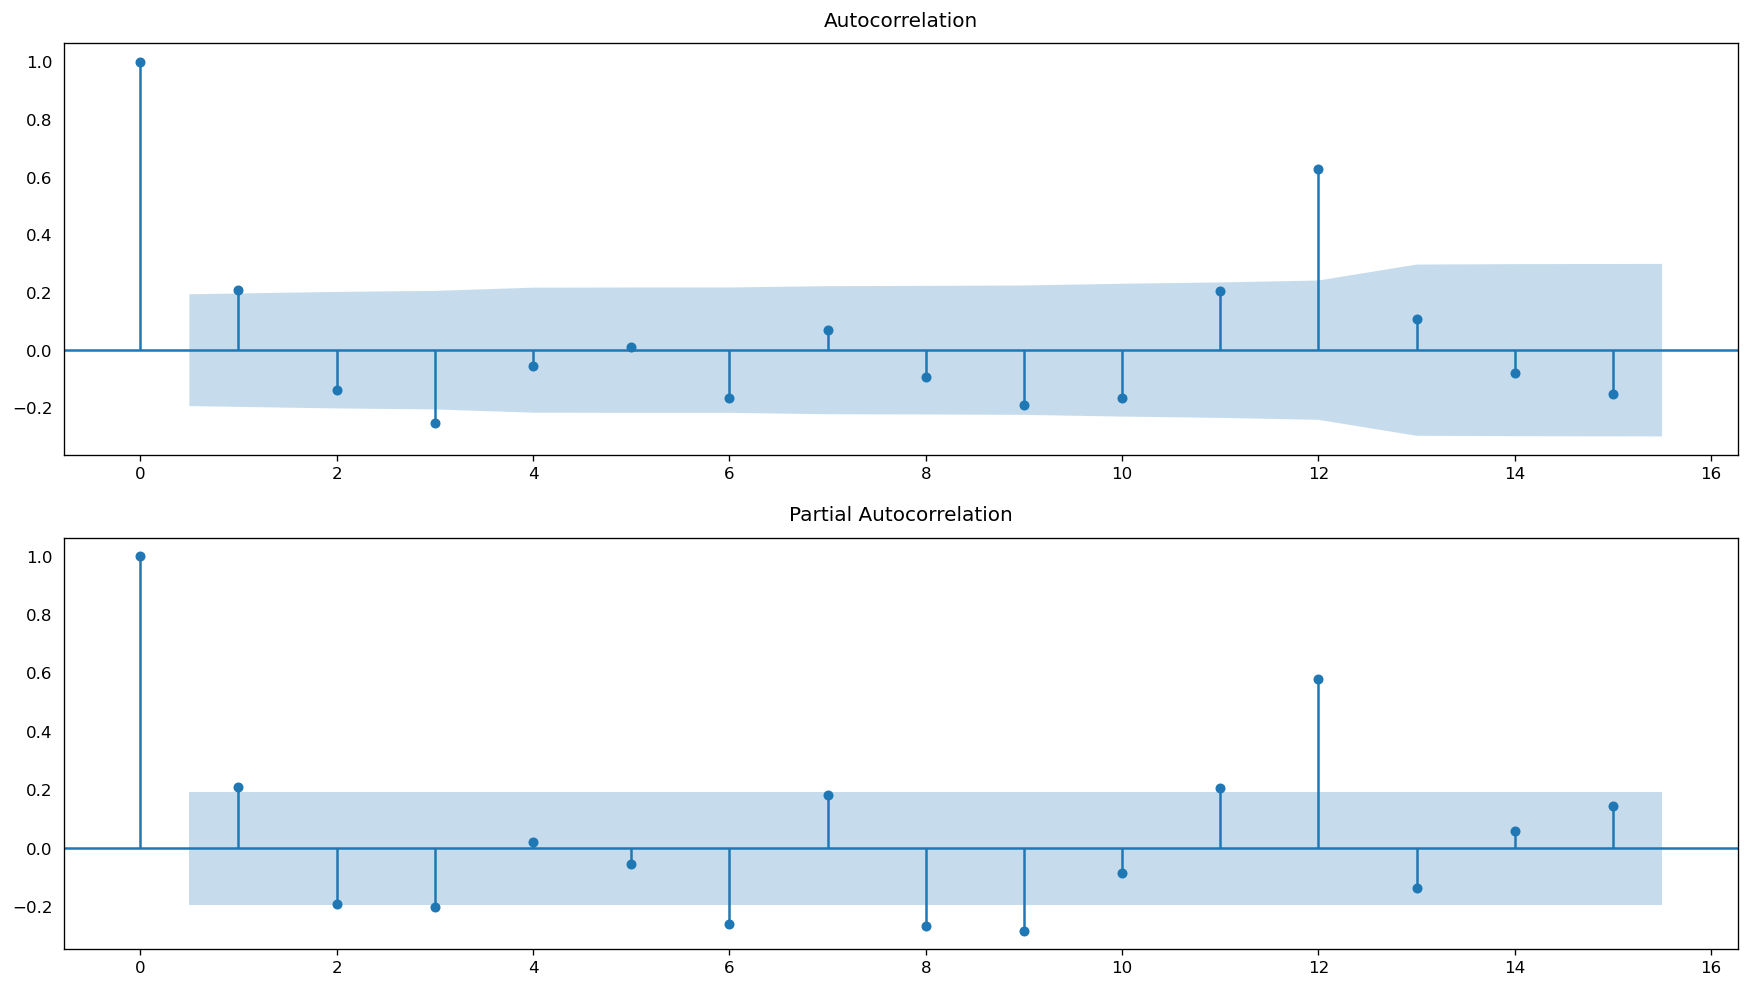

In [116]:
fig, ax = plt.subplots(2,1, figsize =(18, 10))
fig = sm.graphics.tsa.plot_acf(train.diff().dropna(), lags=15, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(train.diff().dropna(), lags=15, ax=ax[1])
plt.show()

In [117]:
import warnings
warnings.filterwarnings('ignore')
res = sm.tsa.arma_order_select_ic(train, max_ar=7, max_ma=7, ic=['aic'], trend='nc')
print(res['aic_min_order'])

(7, 6)


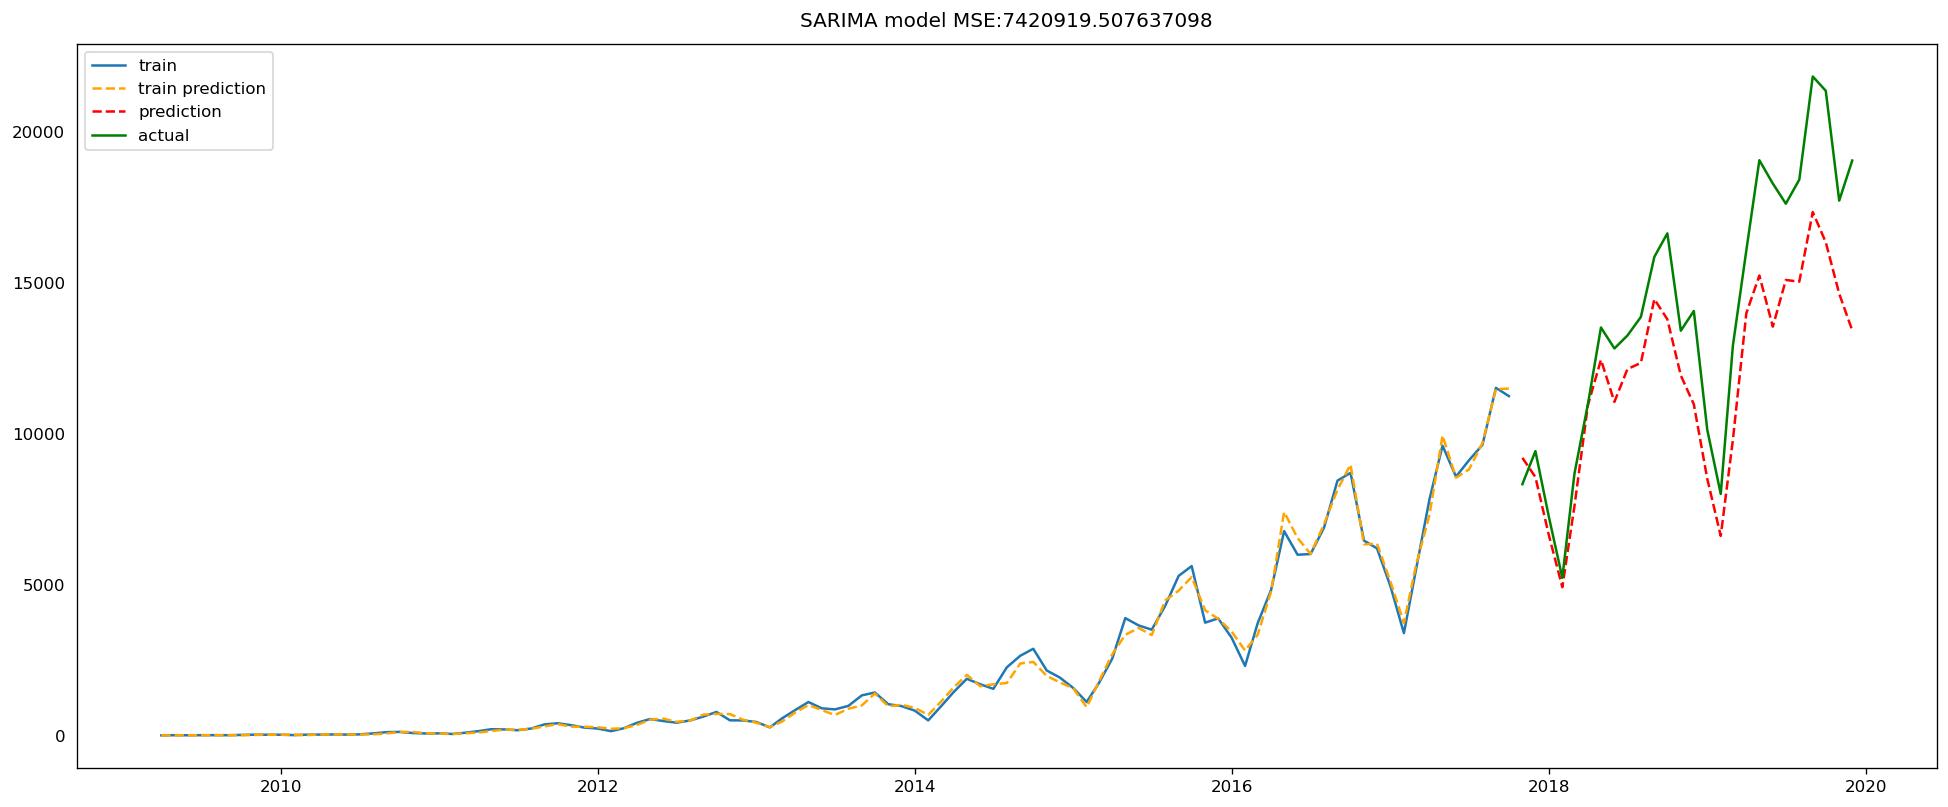

In [118]:
arima = sm.tsa.statespace.SARIMAX(train,order=(6,1,7), seasonal_order=(2,1,0,12),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
#arima.summary()
from sklearn.metrics import mean_squared_error
pred_train = arima.predict(train.index.min(), train.index.max())
pred_test = arima.predict(test.index.min(), test.index.max())
plt.title('SARIMA model MSE:{}'.format(mean_squared_error(test,pred_test)))
plt.plot(train, label='train')
plt.plot(pred_train, color='orange', linestyle='--', label= 'train prediction')
plt.plot(pred_test, color='red', linestyle='--', label= 'prediction')
plt.plot(test, color='green', label='actual')
plt.legend(loc='best')
plt.show()

In [ ]:
# def forecast_accuracy(forecast, actual):
#     mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
#     me = np.mean(forecast - actual)             # ME
#     mae = np.mean(np.abs(forecast - actual))    # MAE
#     mpe = np.mean((forecast - actual)/actual)   # MPE
#     rmse = np.mean((forecast - actual)**2)**.5  # RMSE
#     corr = np.corrcoef(forecast, actual)[0,1]   # corr
#     mins = np.amin(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     maxs = np.amax(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     minmax = 1 - np.mean(mins/maxs)             # minmax
#     acf1 = acf(fc-test)[1]                      # ACF1
#     return({'mape':mape, 'me':me, 'mae': mae, 
#             'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
#             'corr':corr, 'minmax':minmax})

# forecast_accuracy(fc, test.values)

# SARIMA MODEL PART 2

In [119]:
reviews_ny_2021 = reviews_ny[(reviews_ny['date'] > '2019-12-31') & (reviews_ny['date'] < '2022-01-01')]

In [120]:
reviews_ny_2021["date"] = pd.to_datetime(reviews_ny_2021["date"])

In [121]:
reviews_ny_2021['ym_date'] = reviews_ny_2021['date'].dt.strftime('%Y-%m')

In [122]:
reviews_ny_2021['year'] = pd.DatetimeIndex(reviews_ny_2021['date']).year
# reviews_ny_2019['month'] = pd.DatetimeIndex(reviews_ny_2019['date']).month
# reviews_ny_2019['ym_date'] = reviews_ny_2019['date'].dt.strftime('%Y-%m')

In [123]:
reviews_ny_2021.head(10)

,listing_id,date,ym_date,year
99,5136,2021-08-08,2021-08,2021
560,5178,2020-01-03,2020-01,2020
561,5178,2020-01-12,2020-01,2020
562,5178,2020-01-28,2020-01,2020
563,5178,2020-02-01,2020-02,2020
564,5178,2020-02-12,2020-02,2020
565,5178,2020-02-16,2020-02,2020
566,5178,2020-02-22,2020-02,2020
567,5178,2020-02-23,2020-02,2020
568,5178,2020-02-27,2020-02,2020


In [124]:
reviews_ny_2021 = reviews_ny_2021.groupby('ym_date')['listing_id'].size().reset_index()

In [131]:
reviews_ny_2021 = reviews_ny_2021.rename(columns={'listing_id':'total_reviews'})

In [132]:
reviews_ny_2021.head(10)

,ym_date,total_reviews
0,2020-01,13883
1,2020-02,11825
2,2020-03,8942
3,2020-04,1719
4,2020-05,2667
5,2020-06,4246
6,2020-07,6544
7,2020-08,7877
8,2020-09,7505
9,2020-10,8117


In [133]:
# writing reviews file for tableau visualisation
reviews_ny_2021.to_csv (r'D:/airbnb/USA/reviews_ny_2021.csv', index = None, header=True)

In [134]:
ts = pd.read_csv(os.path.join('D:/airbnb/USA/reviews_ny_2021.csv'),parse_dates=["ym_date"], index_col="ym_date")
display(ts.shape)
print(ts.head())
print('Timeseries Range => ', ts.index.min(), ' - ' , ts.index.max())

(24, 1)

            total_reviews
ym_date                  
2020-01-01          13883
2020-02-01          11825
2020-03-01           8942
2020-04-01           1719
2020-05-01           2667
Timeseries Range =>  2020-01-01 00:00:00  -  2021-12-01 00:00:00


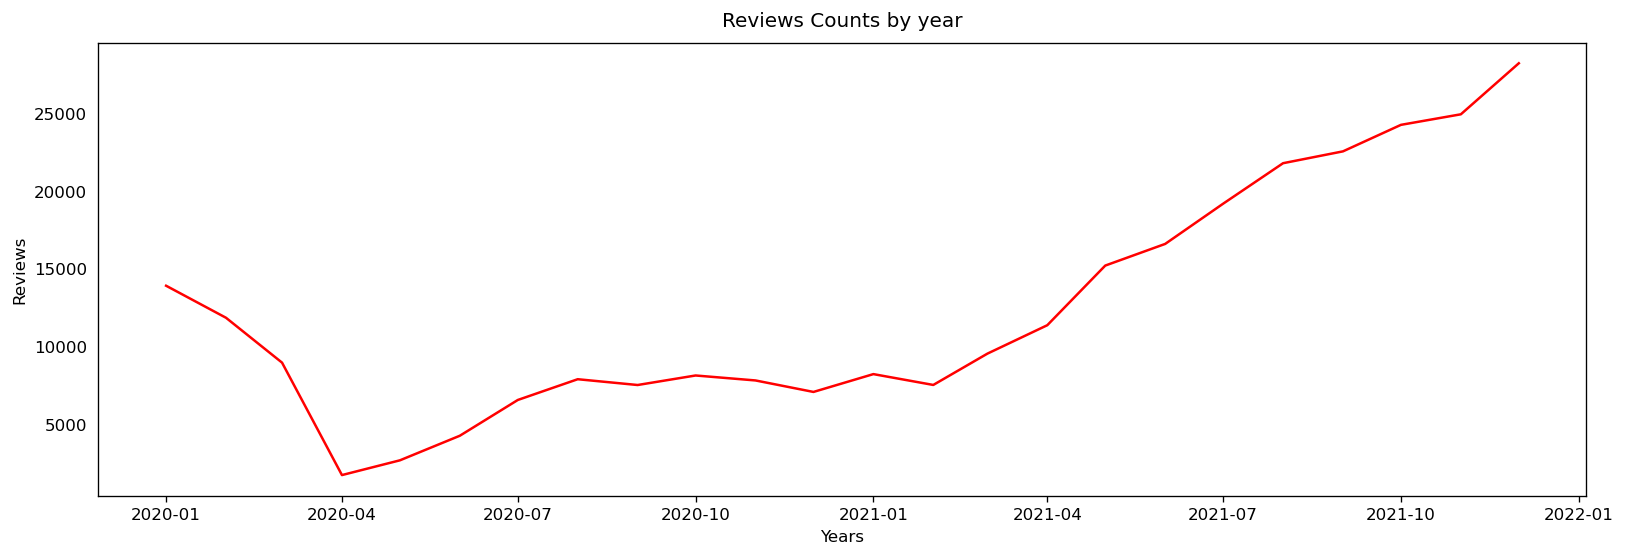

In [135]:
def draw_ts_plot(timeseries, xlabel ='Date', ylabel ='Value', title ="", dpi=120):
    plt.figure(figsize=(16,5),dpi=dpi)
    plt.plot(timeseries, color='red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

draw_ts_plot(ts, xlabel="Years", ylabel = "Reviews", title="Reviews Counts by year")

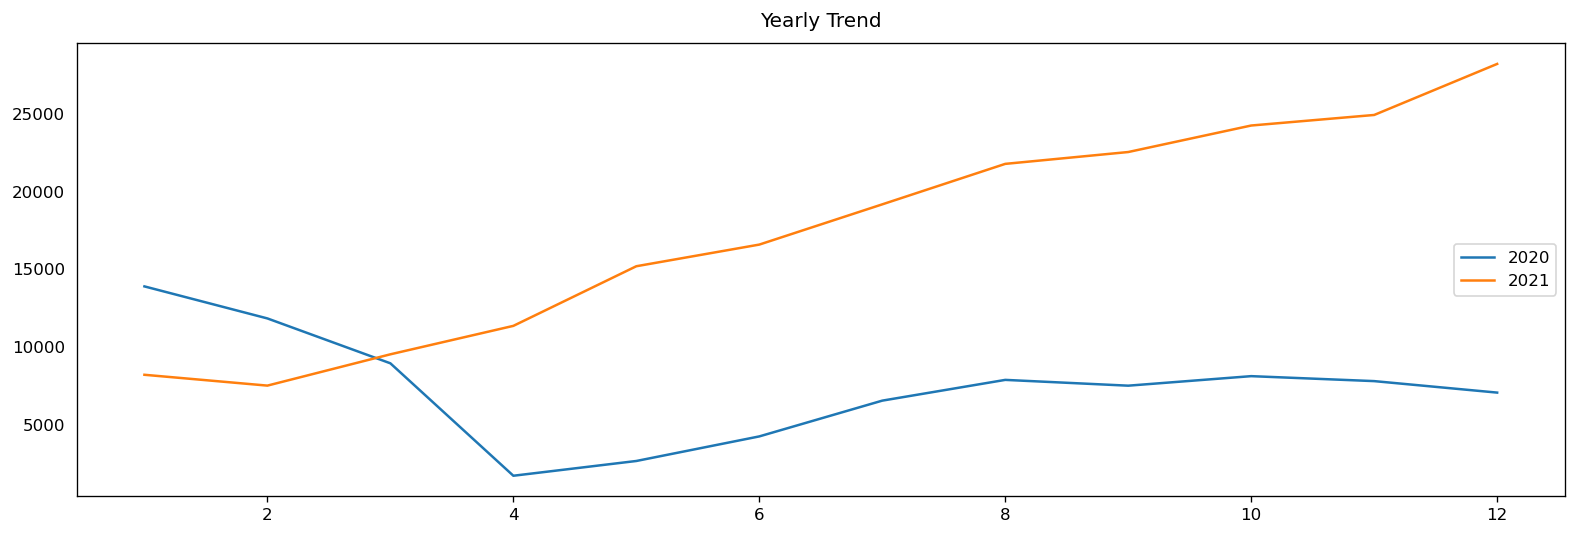

In [137]:
years = ts.index.year.unique()
plt.figure(figsize=(16,5),dpi=120)
for year in years:
    plt.plot(ts.index[ts.index.year == year].month,
    ts[ts.index.year == year]['total_reviews'], label = year )

plt.gca().set(title = "Yearly Trend")
plt.legend(loc='right')
plt.show()

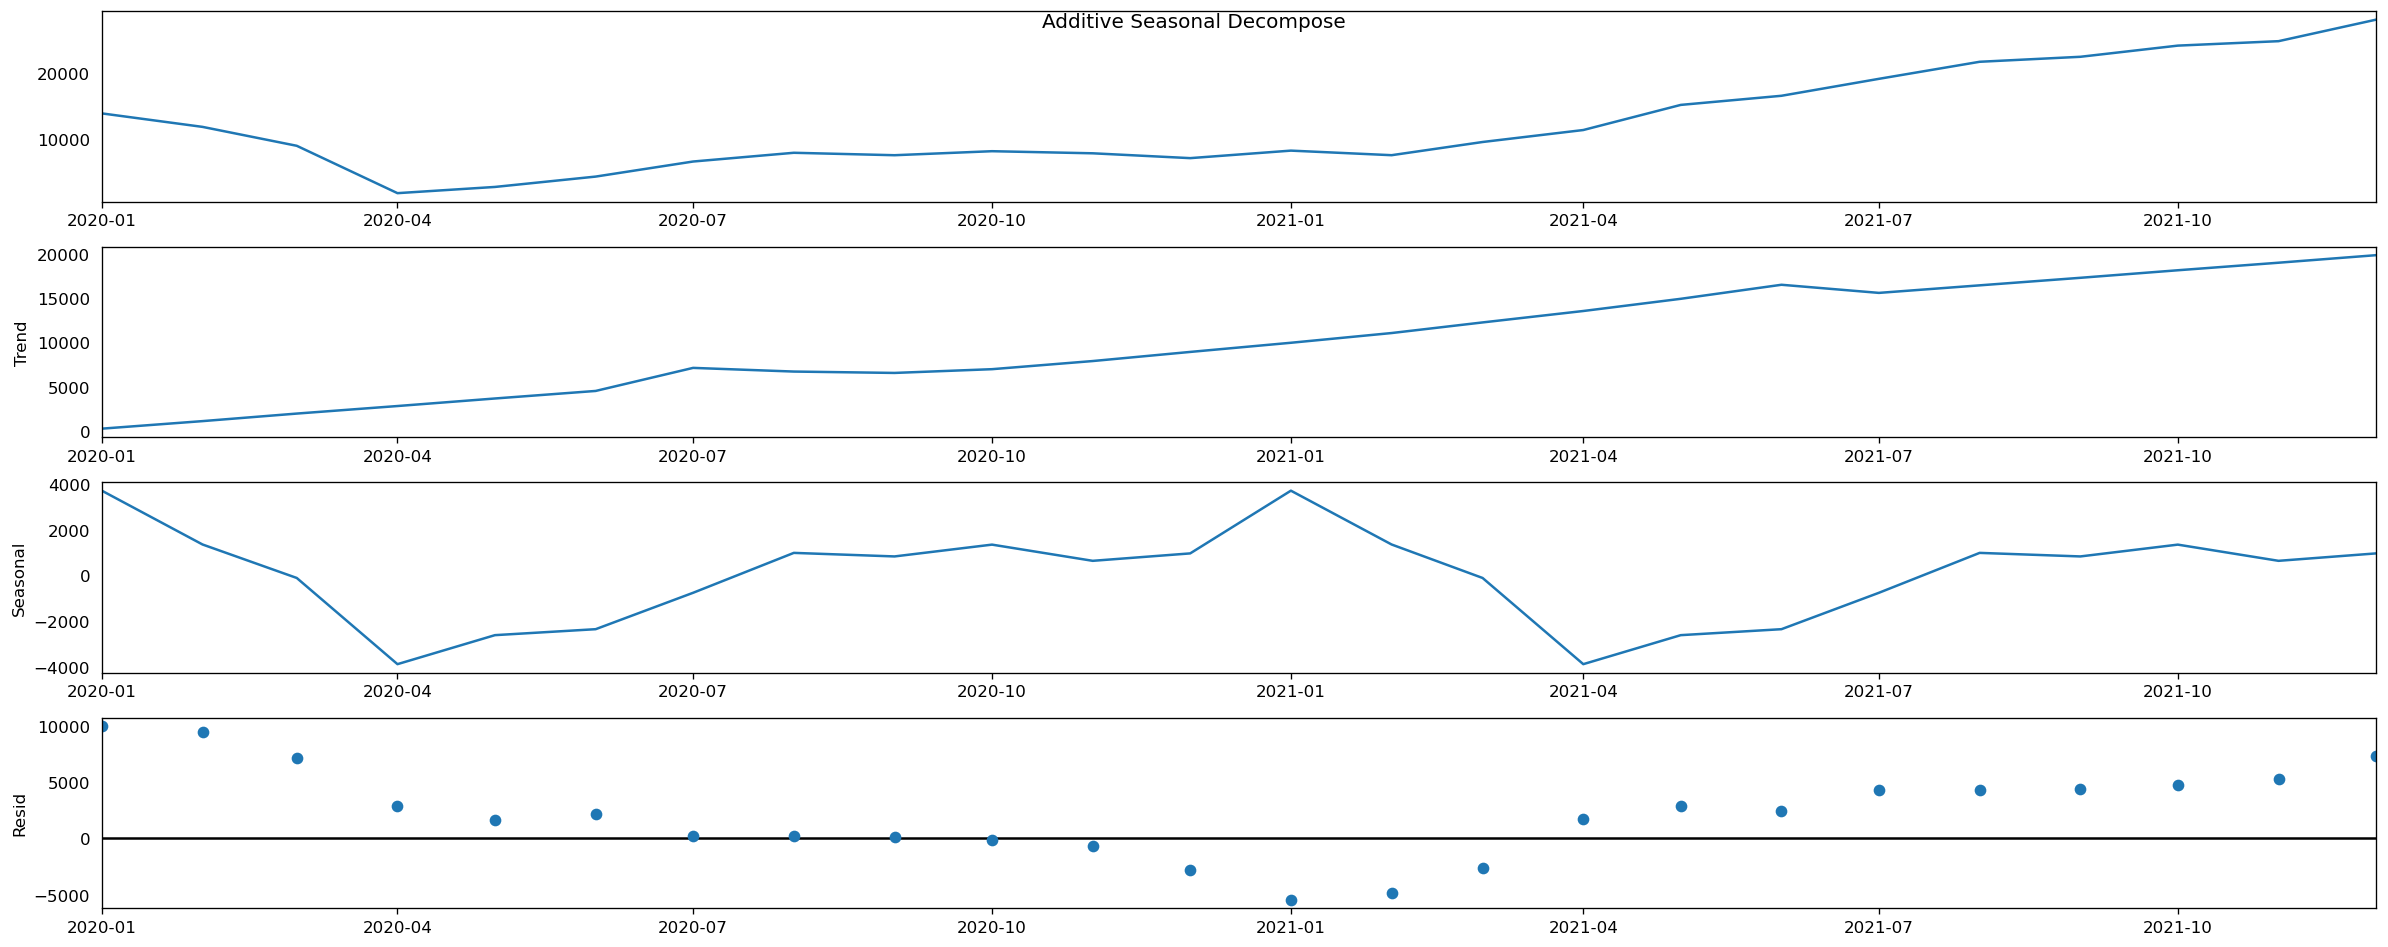

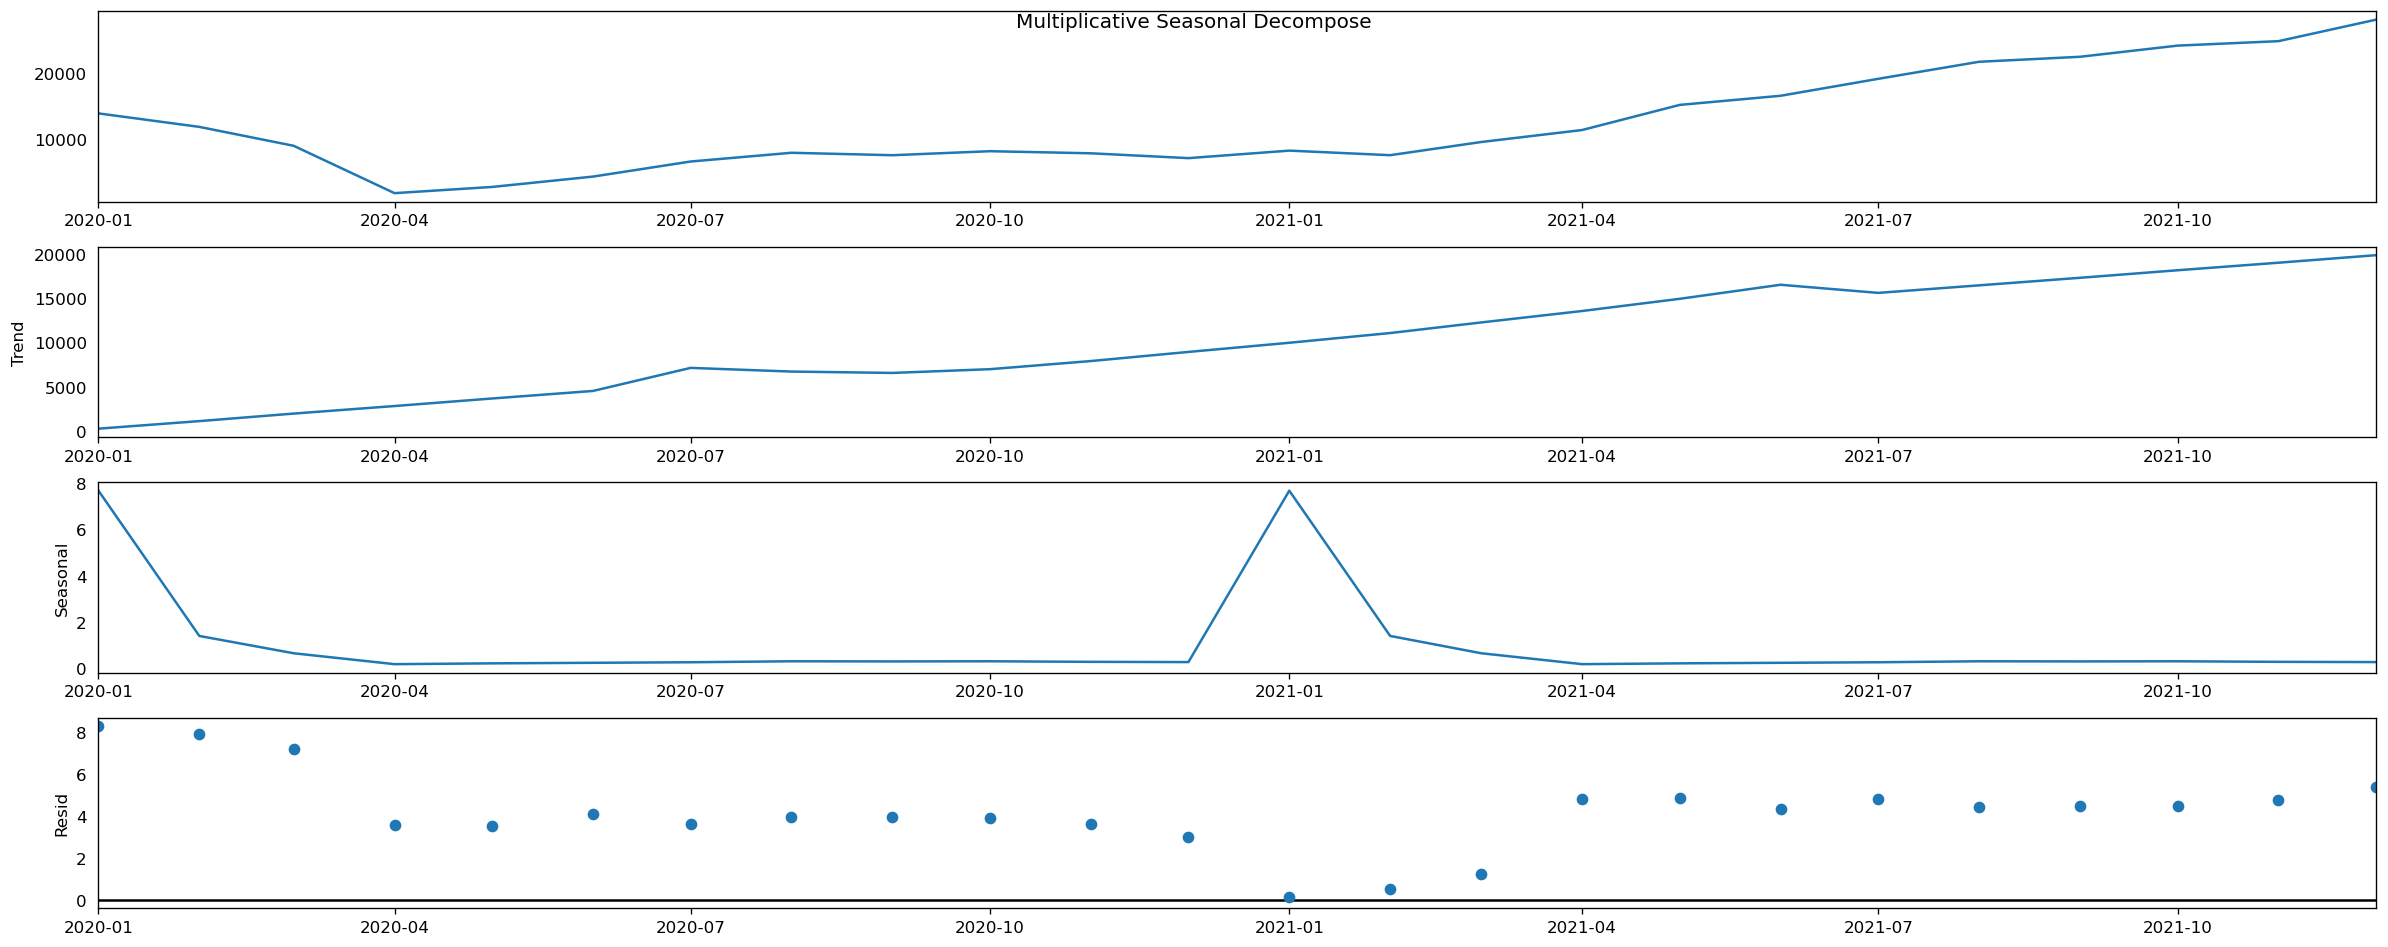

In [138]:
from statsmodels.tsa.seasonal import seasonal_decompose

# additive decomposition
result_additive = seasonal_decompose(ts,model='additive', extrapolate_trend='freq')

# multiplicative
result_multiplicative = seasonal_decompose(ts,model='multiplicative', extrapolate_trend='freq')

# plot
plt.rcParams.update({'figure.figsize':(20,8)})
result_additive.plot()
plt.suptitle('Additive Seasonal Decompose', fontsize=12)
plt.show()

result_multiplicative.plot()
plt.suptitle('Multiplicative Seasonal Decompose', fontsize=12)
plt.show()

In [139]:
df_multiplicative = pd.concat([
    result_multiplicative.observed, 
    result_multiplicative.trend, 
    result_multiplicative.seasonal, 
    result_multiplicative.resid], axis= 1)
df_multiplicative.columns  = ['actual', 'trend','seasonal','resid']
df_multiplicative.head()

,actual,trend,seasonal,resid
ym_date,,,,
2020-01-01,13883.0,218.417803,7.670823,8.286161
2020-02-01,11825.0,1074.011364,1.392590,7.906220
2020-03-01,8942.0,1929.604924,0.644553,7.189644
2020-04-01,1719.0,2785.198485,0.173193,3.563610
2020-05-01,2667.0,3640.792045,0.208246,3.517636


In [141]:
ts.shape

(24, 1)

In [142]:
train = ts[0:-8]
test = ts[-8:]
print('Train Timeseries Range => ', train.index.min(), ' - ' , train.index.max())
print('Train Timeseries Range => ', test.index.min(), ' - ' , test.index.max())

Train Timeseries Range =>  2020-01-01 00:00:00  -  2021-04-01 00:00:00
Train Timeseries Range =>  2021-05-01 00:00:00  -  2021-12-01 00:00:00


In [143]:
# regression{“c”,”ct”,”ctt”,”nc”}
# Constant and trend order to include in regression.

# “c” : constant only (default).
# “ct” : constant and trend.
# “ctt” : constant, and linear and quadratic trend.
# “nc” : no constant, no trend.

for reg in ["c","ct","ctt","nc"]:
    res = sm.tsa.adfuller(train.dropna(),regression=reg)
    print('Reg - {}\t adf :{} - lag used : {}, Critical value : {}'.format(reg, res[0],res[2],res[4]))
    res = sm.tsa.adfuller(train.diff().dropna(),regression=reg)
    print('Reg diff - {}\t adf :{} - lagused : {}, Critical value : {}'.format(reg, res[0],res[2],res[4]))

Reg - c	 adf :0.494367523628561 - lag used : 5, Critical value : {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
Reg diff - c	 adf :-2.4091957883022195 - lagused : 0, Critical value : {'1%': -4.01203360058309, '5%': -3.1041838775510207, '10%': -2.6909873469387753}
Reg - ct	 adf :-2.3191837286073564 - lag used : 0, Critical value : {'1%': -4.7284062962962965, '5%': -3.7567874814814814, '10%': -3.323498888888889}
Reg diff - ct	 adf :-3.4296588543976965 - lagused : 3, Critical value : {'1%': -5.117513876784373, '5%': -3.918385116453794, '10%': -3.4113569872276486}
Reg - ctt	 adf :-2.173600674525249 - lag used : 3, Critical value : {'1%': -5.778870625, '5%': -4.479719166666667, '10%': -3.9317654398148147}
Reg diff - ctt	 adf :-2.3332511116545276 - lagused : 1, Critical value : {'1%': -5.626523627674101, '5%': -4.414418812016386, '10%': -3.895017123350023}
Reg - nc	 adf :0.0 - lag used : 7, Critical value : {'1%': -2.9018868749999998, '5%': -1.966170703125, '10%': -1.5764871875}
Reg diff 

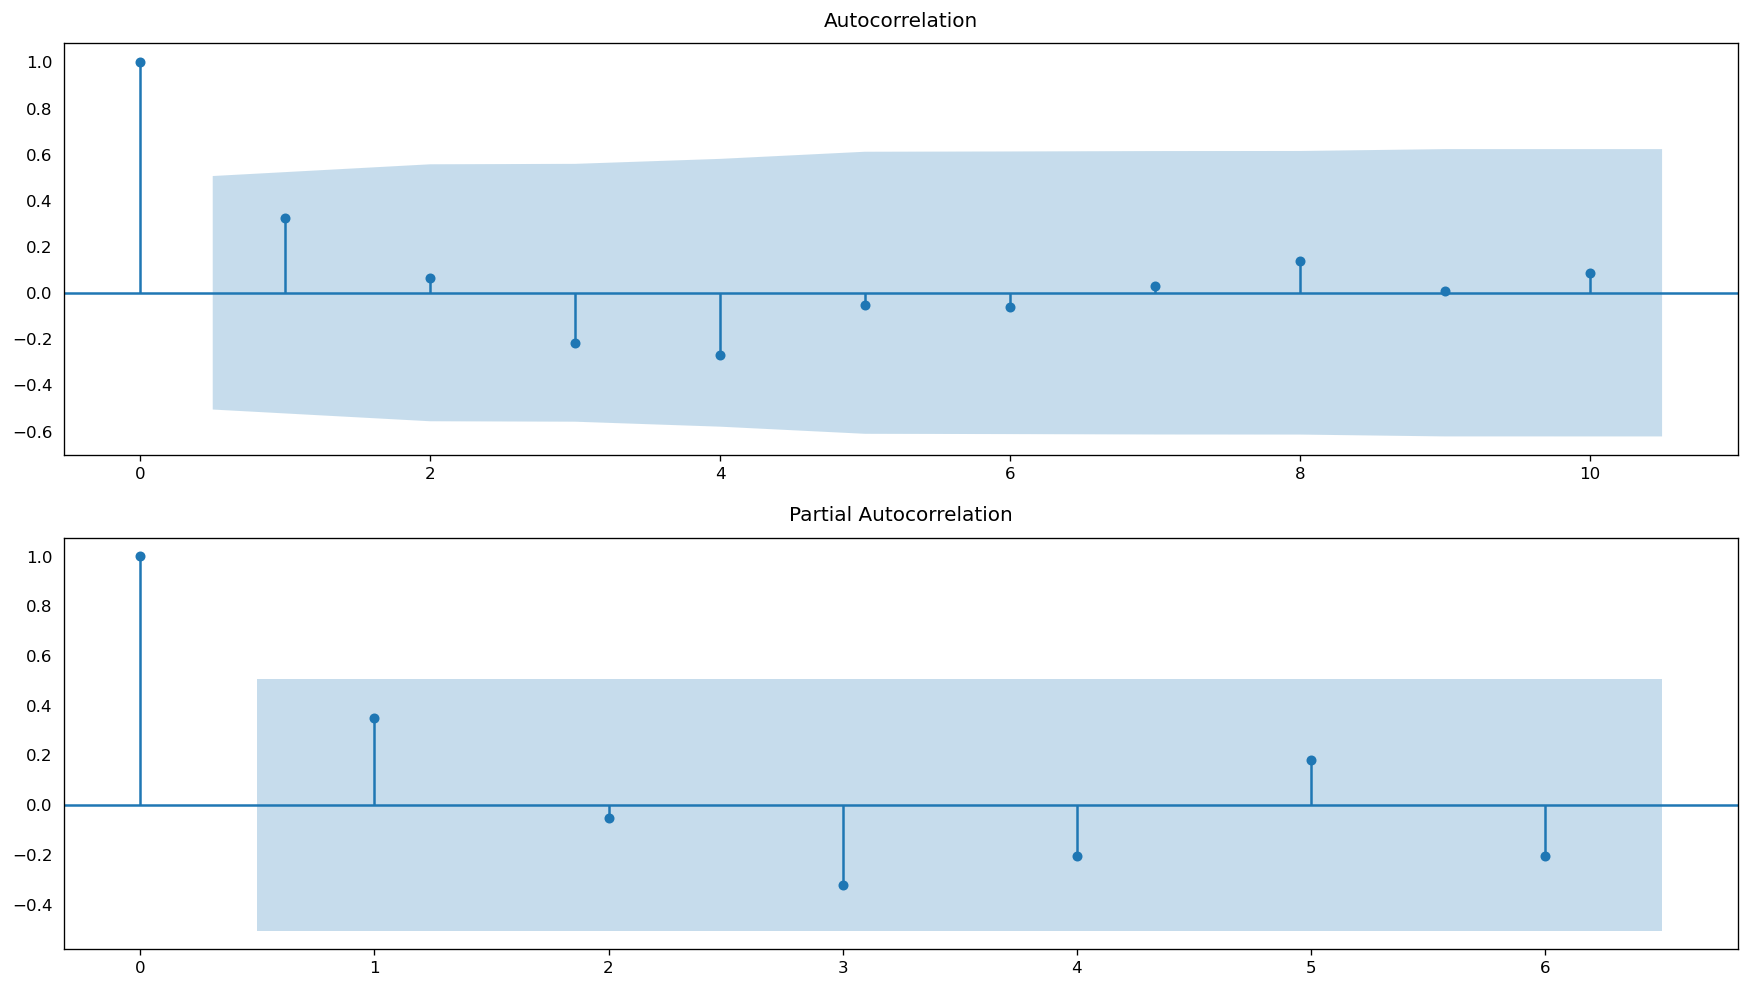

In [443]:
fig, ax = plt.subplots(2,1, figsize =(18, 10))
fig = sm.graphics.tsa.plot_acf(train.diff().dropna(), lags=10, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(train.diff().dropna(), lags=6, ax=ax[1])
plt.show()

In [144]:
import warnings
warnings.filterwarnings('ignore')
res = sm.tsa.arma_order_select_ic(train, max_ar=7, max_ma=7, ic=['aic'], trend='nc')
print(res['aic_min_order'])

(1, 0)


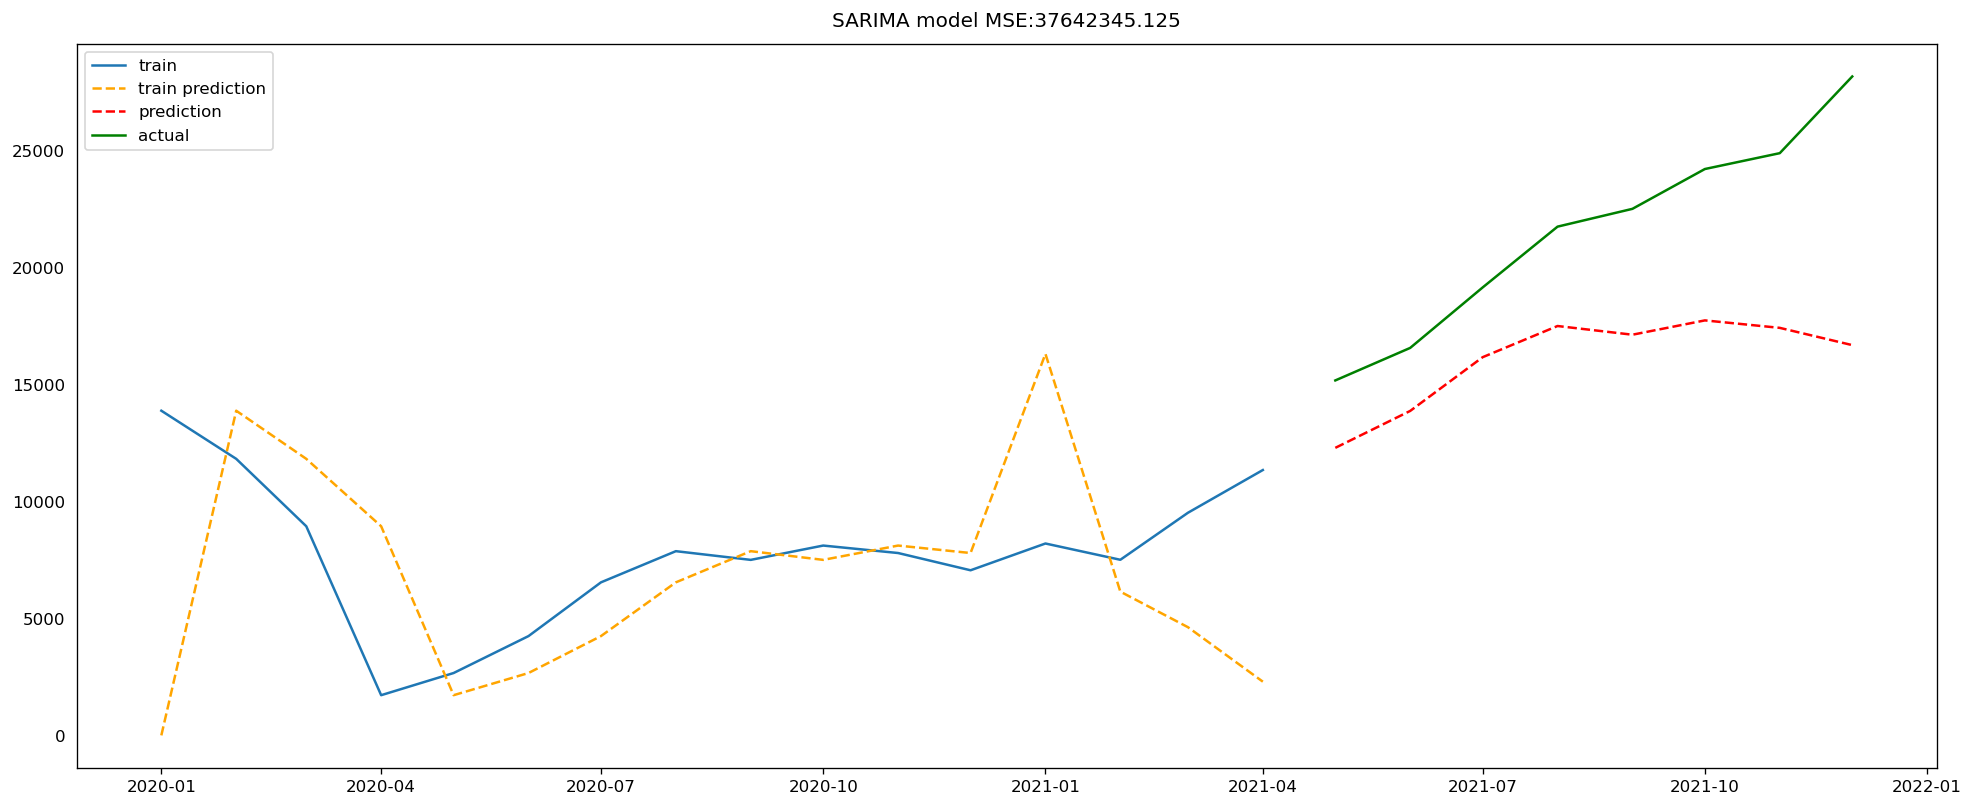

In [146]:
sarima = sm.tsa.statespace.SARIMAX(train,order=(6,1,7), seasonal_order=(2,1,0,12),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
#arima.summary()
from sklearn.metrics import mean_squared_error
pred_train = sarima.predict(train.index.min(), train.index.max())
pred_test = sarima.predict(test.index.min(), test.index.max())
plt.title('SARIMA model MSE:{}'.format(mean_squared_error(test,pred_test)))
plt.plot(train, label='train')
plt.plot(pred_train, color='orange', linestyle='--', label= 'train prediction')
plt.plot(pred_test, color='red', linestyle='--', label= 'prediction')
plt.plot(test, color='green', label='actual')
plt.legend(loc='best')
plt.show()

##########################################